In [3]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250525 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" #"/data/big_rim/rsync_dcc_sum/24summ" #"/data/big_rim/rsync_dcc_sum/25Apri_social" #"/data/big_rim/rsync_dcc_sum/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = '/data/big_rim/rsync_dcc_sum/Oct3V1/sync_failed_brws.txt'  # File containing failed paths


    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.0001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


Log for 20241217v1l23re1_p20241217v1l23BE0 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0/folder_log.parquet
Log for 20241217v1l23re1 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/folder_log.parquet
Log for 20241015pmcr1_AO_14_52 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr1_AO_14_52/folder_log.parquet
Log for 20241015pmcr2_AO_12_52 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52/folder_log.parquet
Log for 2social_mini_20241015pmcr2_single_AO_13_24 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/folder_log.parquet
Log for 2social_mini_0605pmc_single_15_38 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38/folder_log.parquet
Log for 2social_mini_0605pmc_single_15_00 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00/folder_log.parquet
Log for 

In [4]:
# sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" 
all_df = read_all_parquet_files(base_folder)

In [8]:
import pyarrow.compute as pc
from functools import reduce


table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
conditions = [
   pc.equal(table['mir_generate_param'], '1'),
   pc.equal(table['sync'], '1'),
   pc.not_equal(table['sync'], '3'),
   pc.equal(table['com'], '1'),
   pc.equal(table['com_vis'], '1'),
   # pc.equal(table['v1'], '1'),
   # pc.equal(table['dannce'], '1'),
   # pc.equal(table['dannce_vis'], '1'),
   pc.equal(table['social'], '1'),
   pc.equal(table['mini_6cam_map'], '1'),
   pc.equal(table['mini_rec_sync_com'], '1'),
   #mini_rec_sync
   # mini_6cam_map
]

filter_mask = reduce(pc.and_, conditions)



# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com com_vis social  \
0                  1    1             1            0   1       1      1   
1                  1    1             1            0   1       1      1   
2                  1    1             1            0   1       1      1   
3                  1    1             1            0   1       1      1   
4                  1    1             1            0   1       1      1   
5                  1    1             1            0   1       1      1   
6                  1    1             1            0   1       1      1   
7                  1    1             1            0   1       1      1   
8                  1    1             1            0   1       1      1   
9                  1    1             1            0   1       1      1   

  miniscope test after_oxytocin before_oxytocin dannce dannce_vis  \
0         1    1              0               0      0          0   
1         1    0              0     

In [18]:
# Convert and flatten the ChunkedArray
rec_paths = filtered_table["rec_path"].to_pylist()

# Print each path
for path in rec_paths:
    # Each element is likely a list with one string, e.g., ['/some/path']
    print(path[0] if isinstance(path, list) else path)


/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_femalebleach_11_48
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240819V1r1_AO_single_14_30
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_p20240717PMC_social_test_11_30
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240521b1697576_social_test_13_26
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240717PMC_social_test_13_16
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r1mini_p20240717PMC_social_14_31
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_p20240717PMC_social_14_04
/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_p20241111_social_12_

In [15]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_mirgenparam

sequential_process_and_update_mirgenparam(filtered_table, base_folder)

Found 6 calibration files.
Frame count: 27900
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam1_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam2_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam3_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam4_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam5_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam6_params.mat
Data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/2024_09_18_20240819_V1_r1_calib_before_label3d_dannce.mat
mir_generate_param ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/folder_log.parquet with new status.
Found 6 calibration files.
Frame count: 27900
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hi

In [6]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_sync

sequential_process_and_update_sync(filtered_table, base_folder, max_frames=800) #threshold=2, max_frames=300, min_frame=0

Processing: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53
removed/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53/df_synced_2024_10_14_20240916v1r1_14_53_calib_before_label3d_dannce.mat


KeyboardInterrupt: 

In [ ]:
# single com vis

from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# Assume base_folder is defined elsewhere in your script
# base_folder = '/path/to/your/base/folder'
for_com_vis = filtered_table
records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_com_vis['date_folder'], for_com_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
for record in records:
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    plot_com_all(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False


In [ ]:
# social com vis

# from utlis.vis_valid_utlis.com_trag_updated import plot_com_all
from utlis.vis_valid_utlis.scom_traga_utlis import plot_com_all_social

# Assume base_folder is defined elsewhere in your script
# base_folder = '/path/to/your/base/folder'
for_com_vis = filtered_table
records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_com_vis['date_folder'], for_com_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
for record in records:
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    plot_com_all_social(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False


/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819-V1-r2/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240707-PMC-r1/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17/data/b

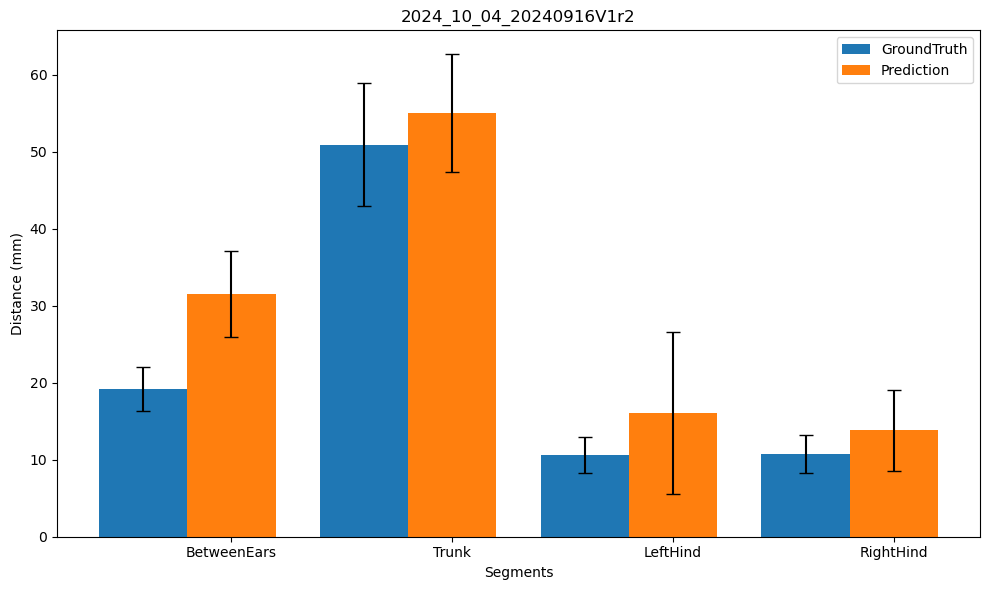

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35/DANNCE/predict00/vis/2024_10_14_20240916v1r1_16_35.jpg'./data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37



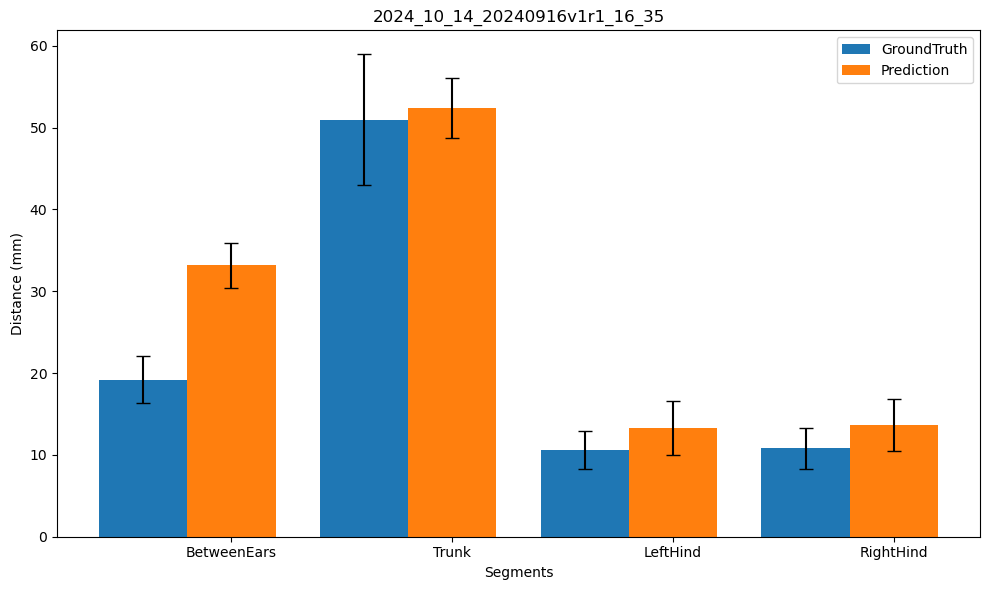

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_06/DANNCE/predict00/vis/2025_02_13_20241225PMCLE1mini_11_06.jpg'.


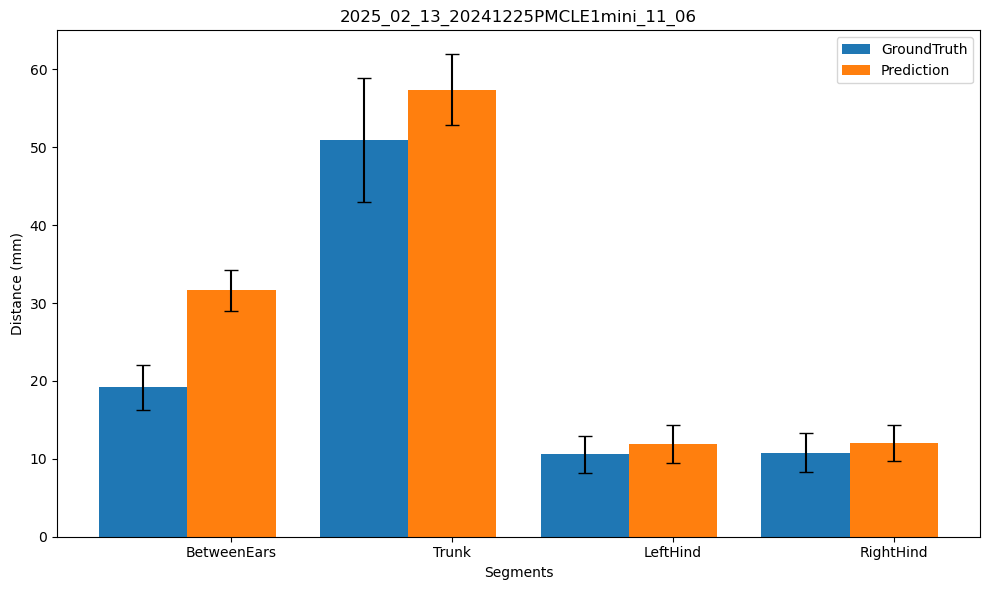

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44/DANNCE/predict00/vis/2025_02_12_20241001PMCRE2mini_13_44.jpg'.



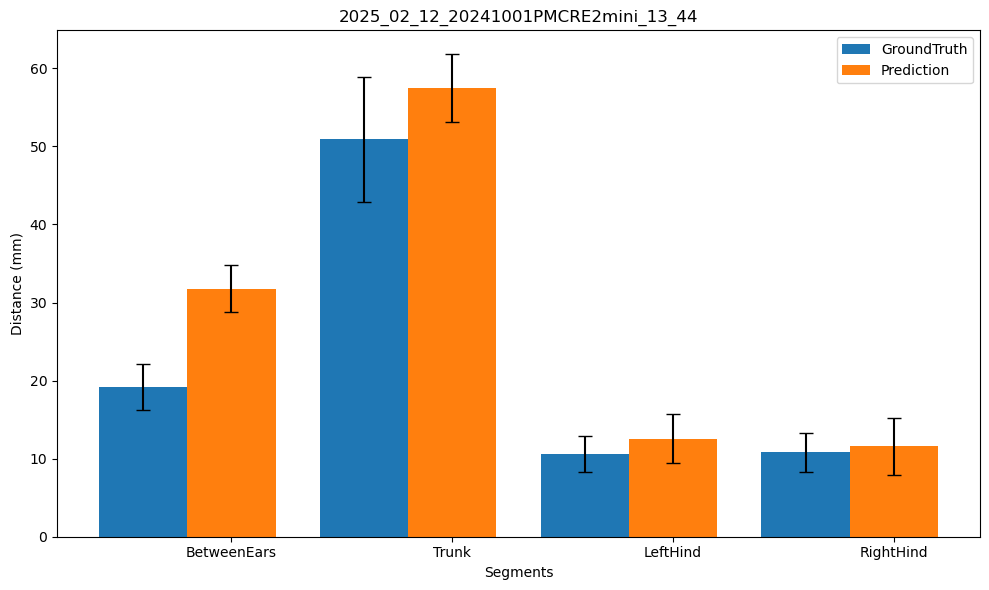

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_11_21/DANNCE/predict00/vis/2024_12_18_20240919v1l5r1mini_11_21.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22/DANNCE/predict00/vis/2025_02_12_20241001PMCRE2mini_15_22.jpg'.


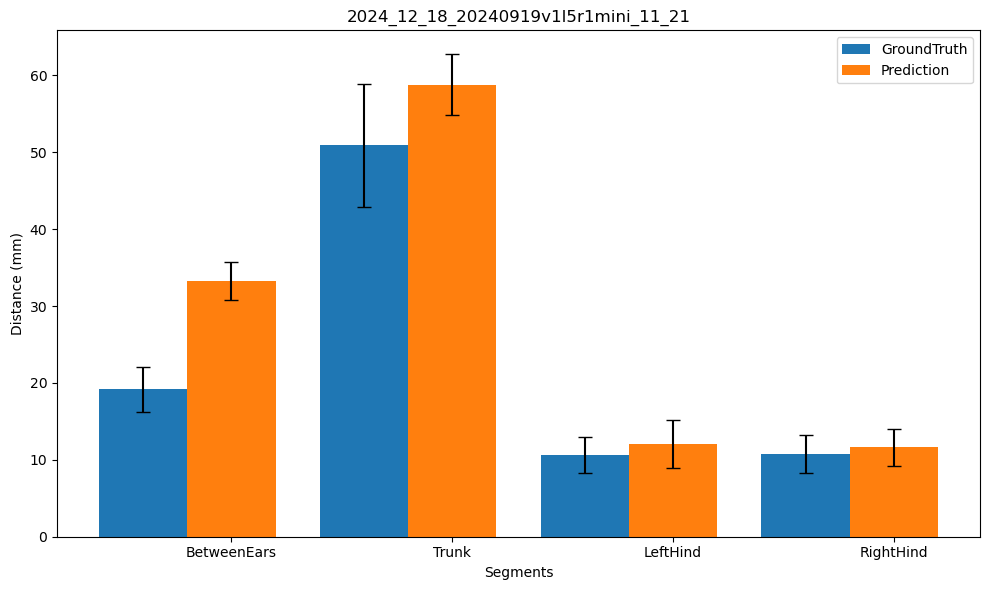

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23F
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57/DANNCE/predict00/vis/2025_02_12_20241001PMCRE2mini_13_57.jpg'.


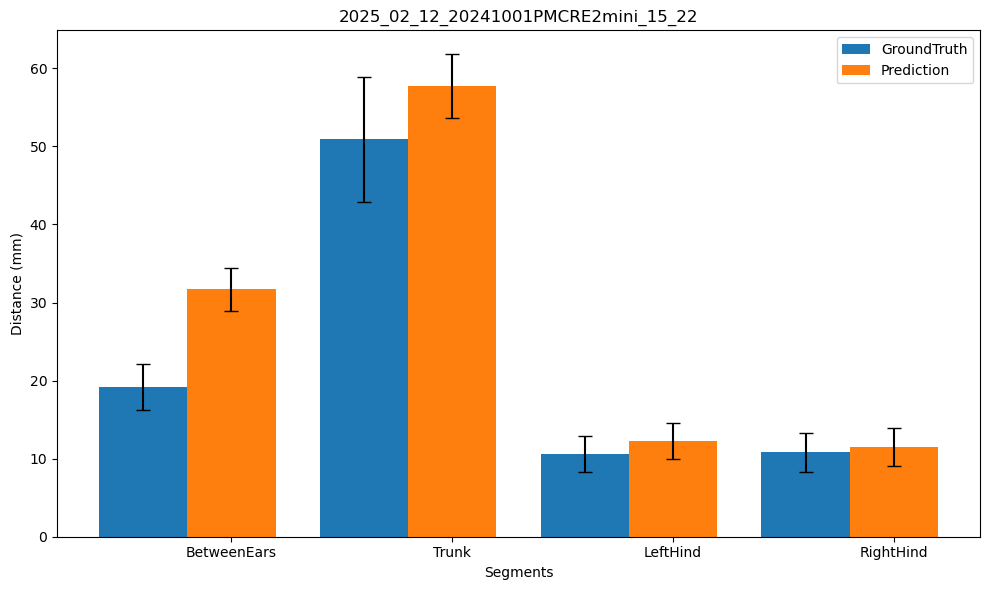

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45


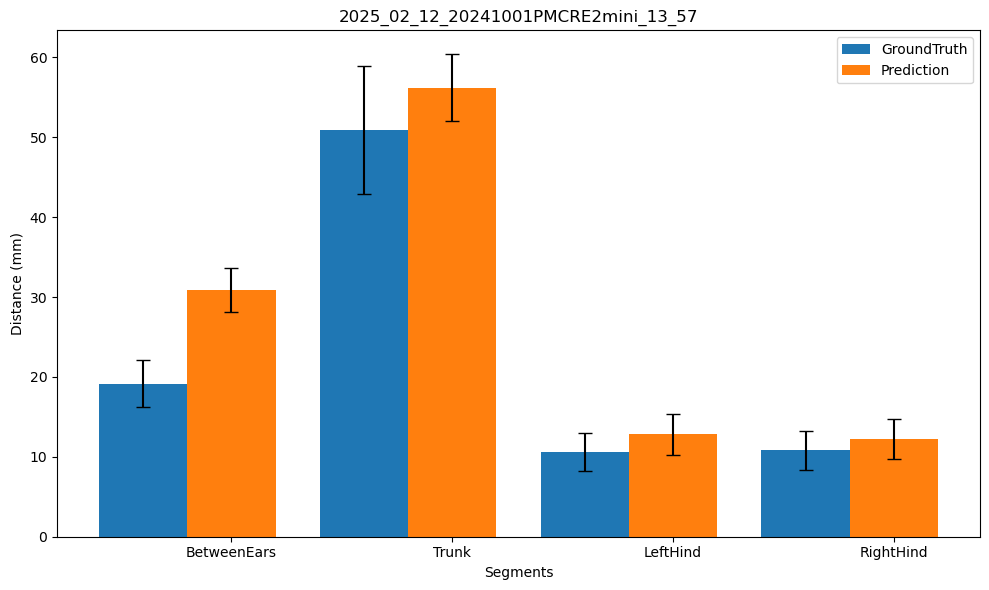

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r1mini_11_22/DANNCE/predict00/vis/2024_12_31_20241212v1l1r1mini_11_22.jpg'.


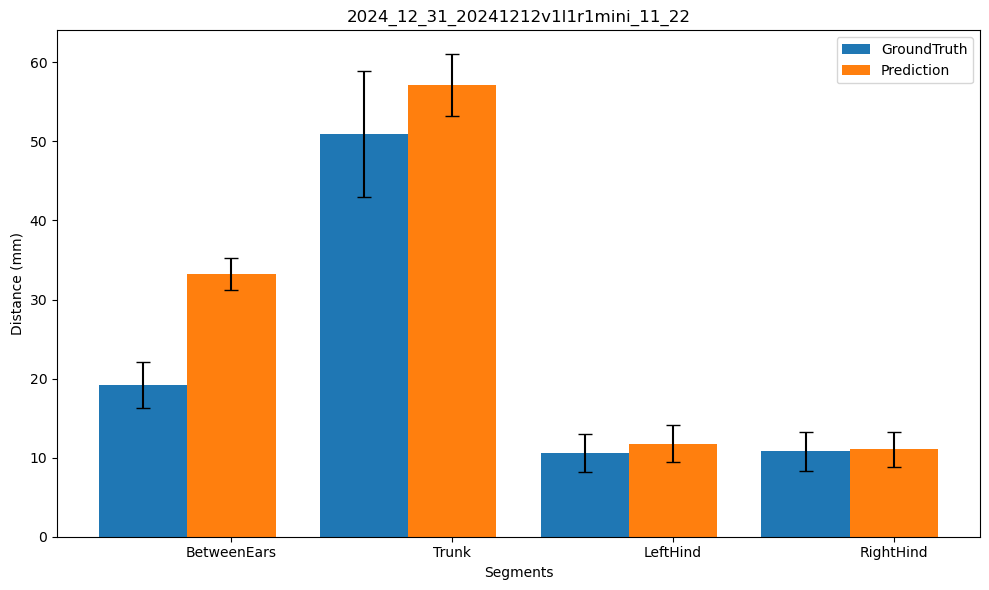

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54/DANNCE/predict00/vis/2024_12_31_20240919v1l5r2mini_13_54.jpg'.


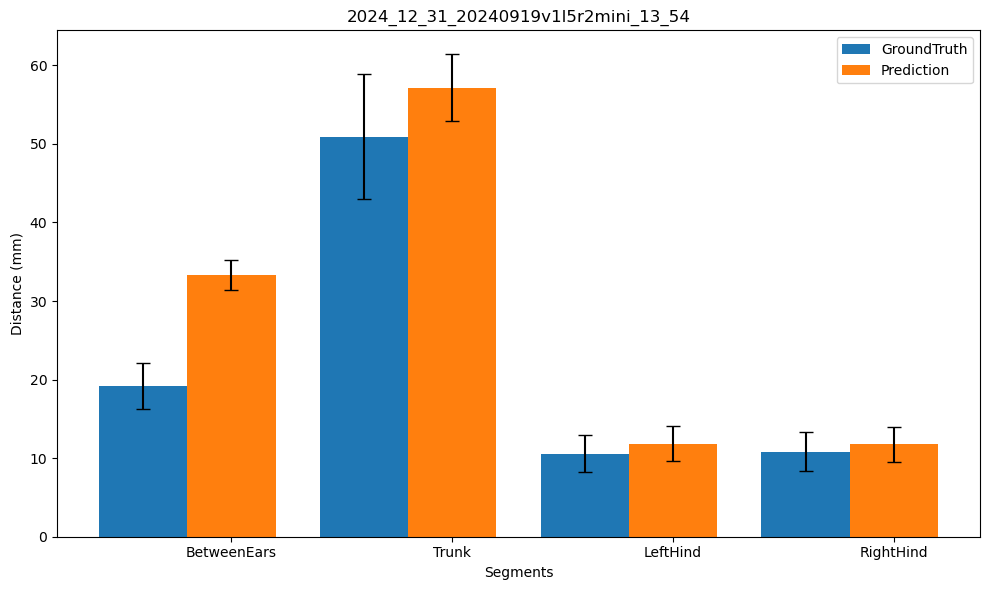

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/DANNCE/predict00/vis/2024_10_03_20240819V1r2.jpg'.


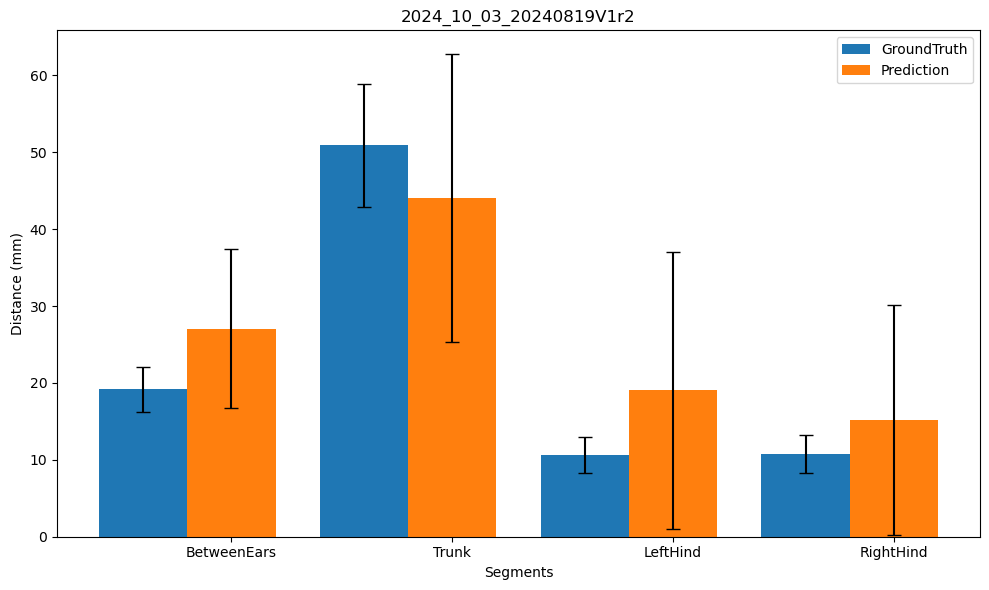

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04/DANNCE/predict00/vis/2024_12_31_20241212v1l1r2mini_12_04.jpg'.


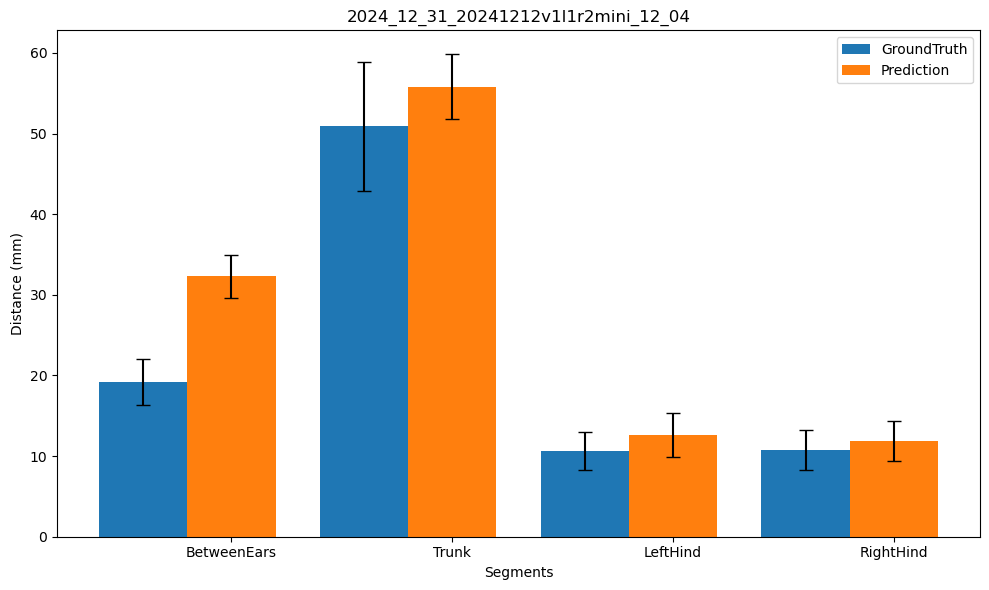

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40/DANNCE/predict00/vis/2024_10_08_20240916v1r1_14_40.jpg'.


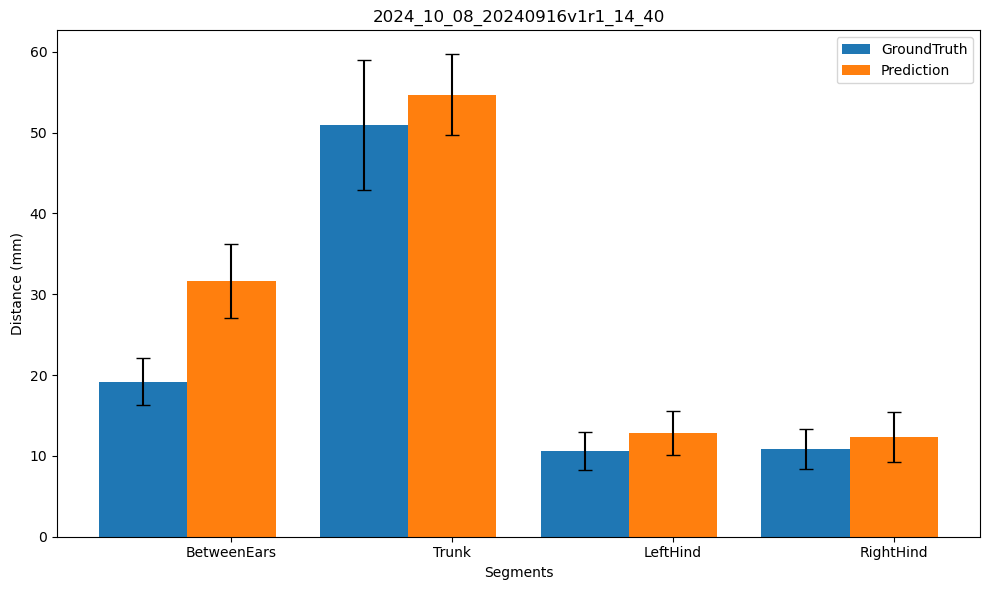

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05/DANNCE/predict00/vis/2024_10_04_20240819V1r1_21_05.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_23/DANNCE/predict00/vis/2025_02_13_20241225PMCLE1mini_11_23.jpg'.


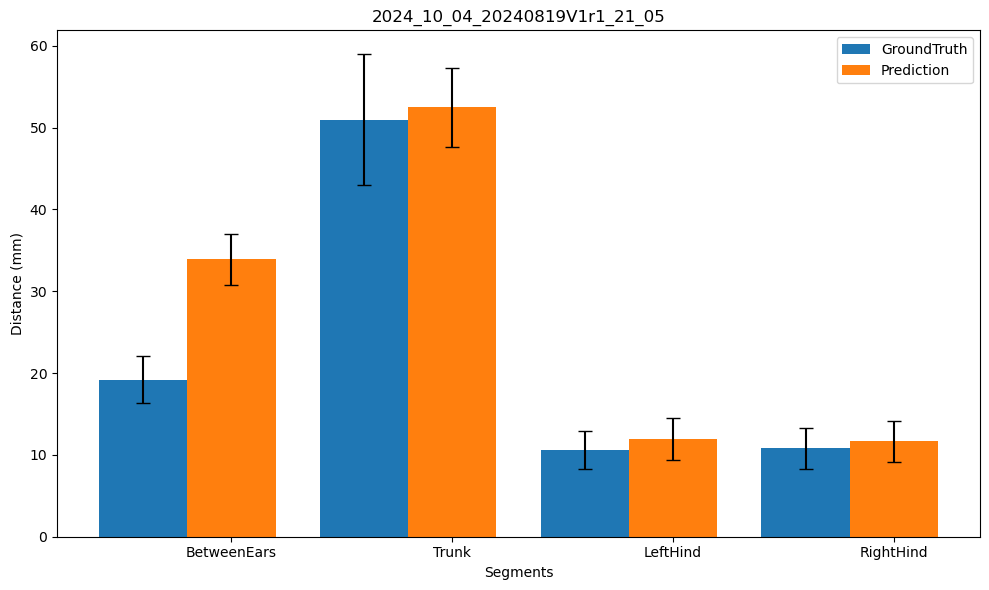

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16


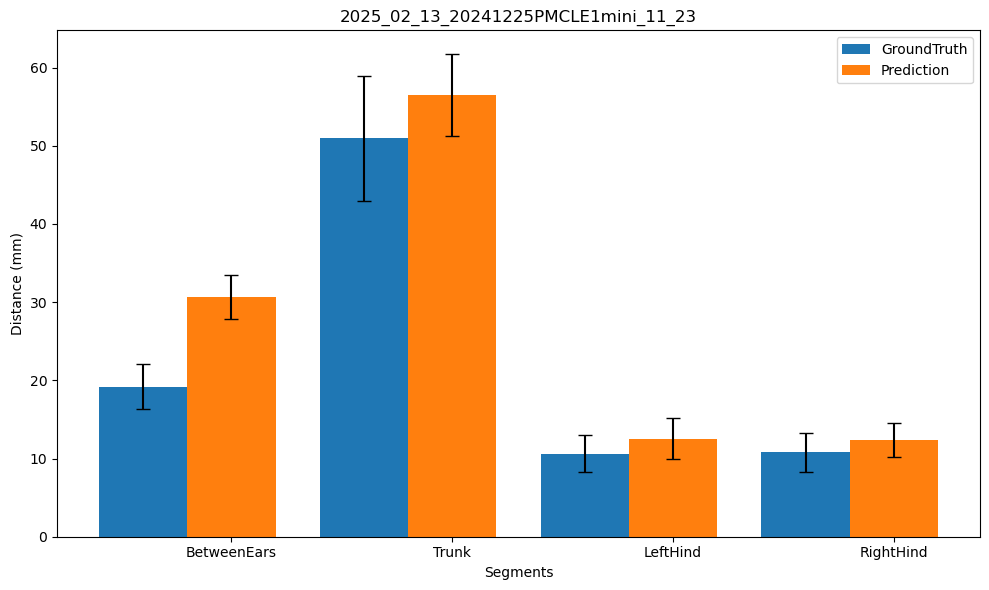

/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56/DANNCE/predict00/vis/2024_11_01_20240819V1r1_AO_14_56.jpg'.


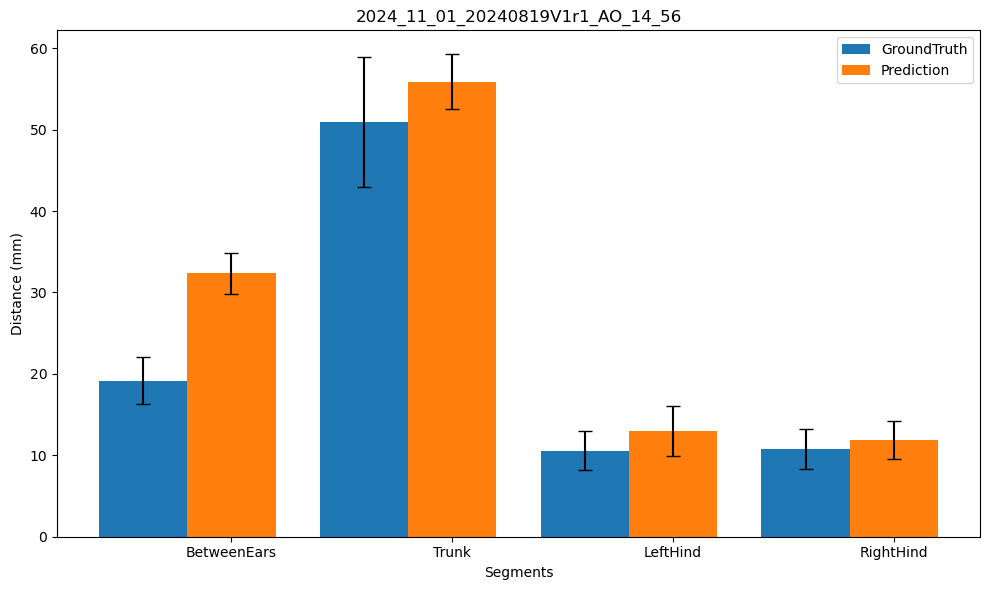

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54/DANNCE/predict00/vis/2024_10_25_20241002PMCr1_14_54.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/DANNCE/predict00/vis/2024_10_25_20241002PMCr2_15_42.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00/DANNCE/predict00/vis/2024_10_08_20240819V1r1_20_00.jpg'.


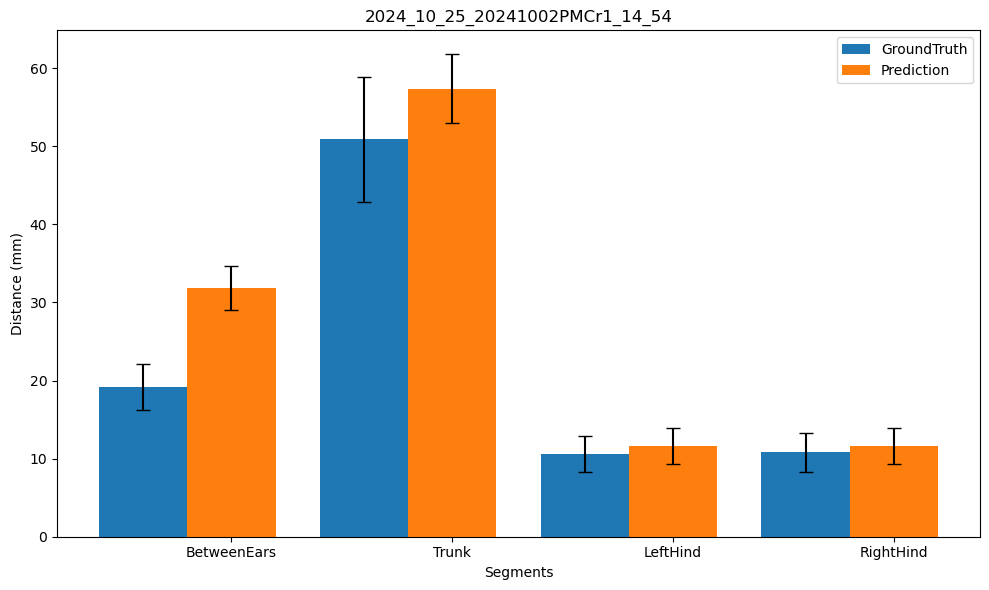

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35/DANNCE/predict00/vis/2024_10_08_20240916v1r1_15_35.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/DANNCE/predict00/vis/2024_10_14_20240916v1r2_15_58.jpg'.


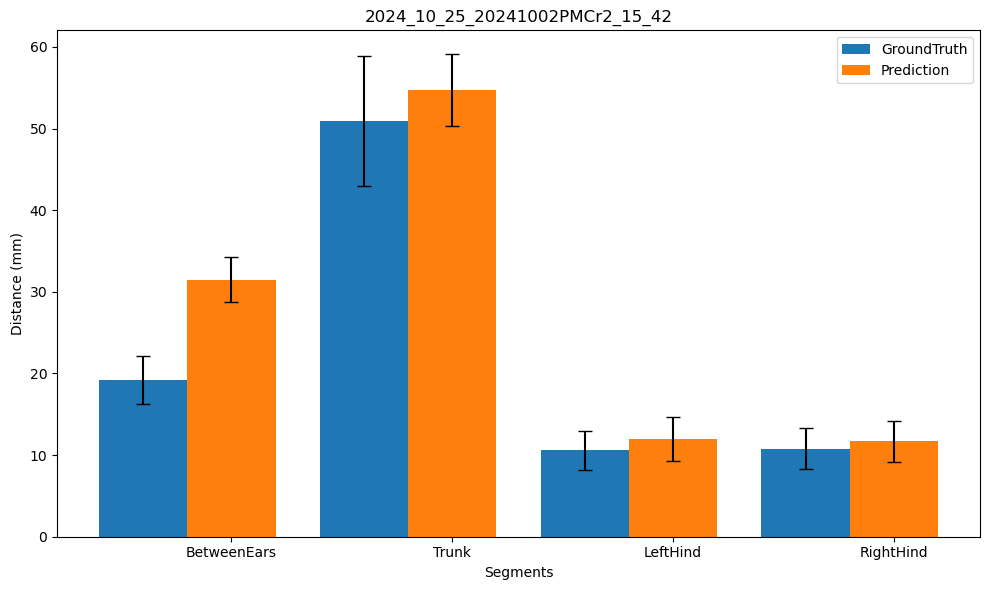

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_/DANNCE/predict00/vis/2024_10_24_20241002PMCr1_left1_.jpg'.


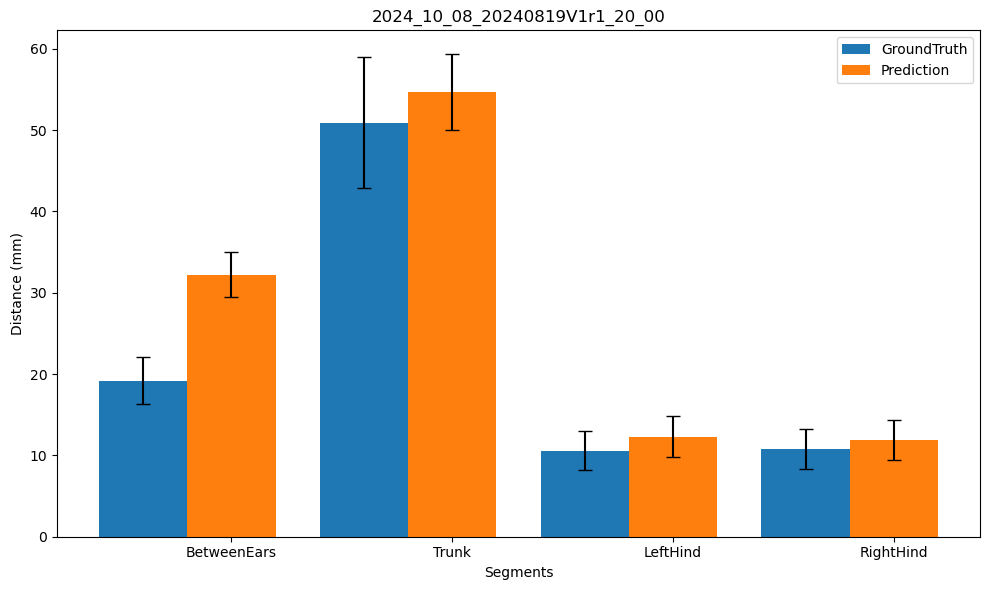

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30/DANNCE/predict00/vis/2024_10_25_20240916v1r2_14_30.jpg'.


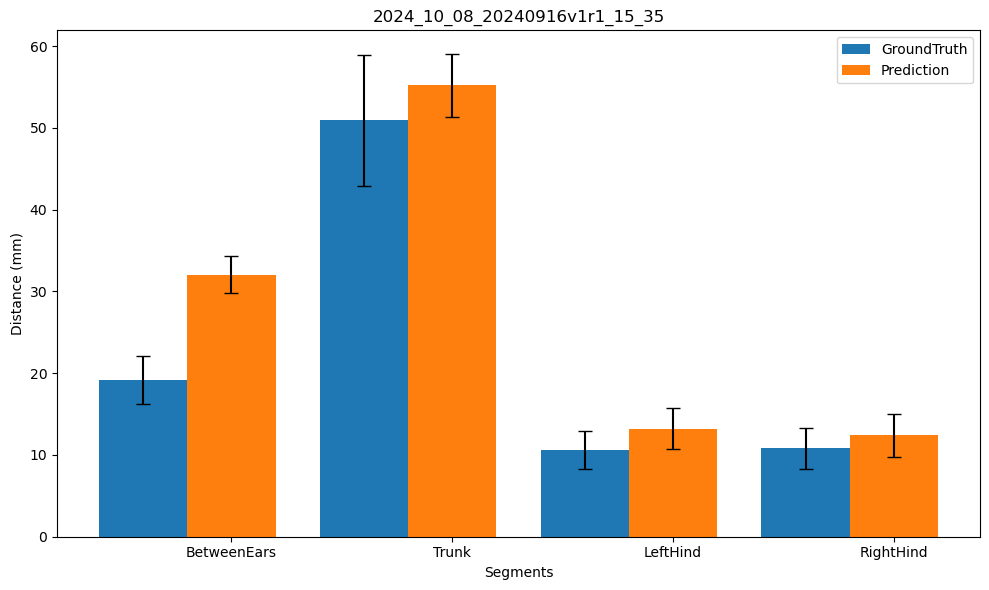

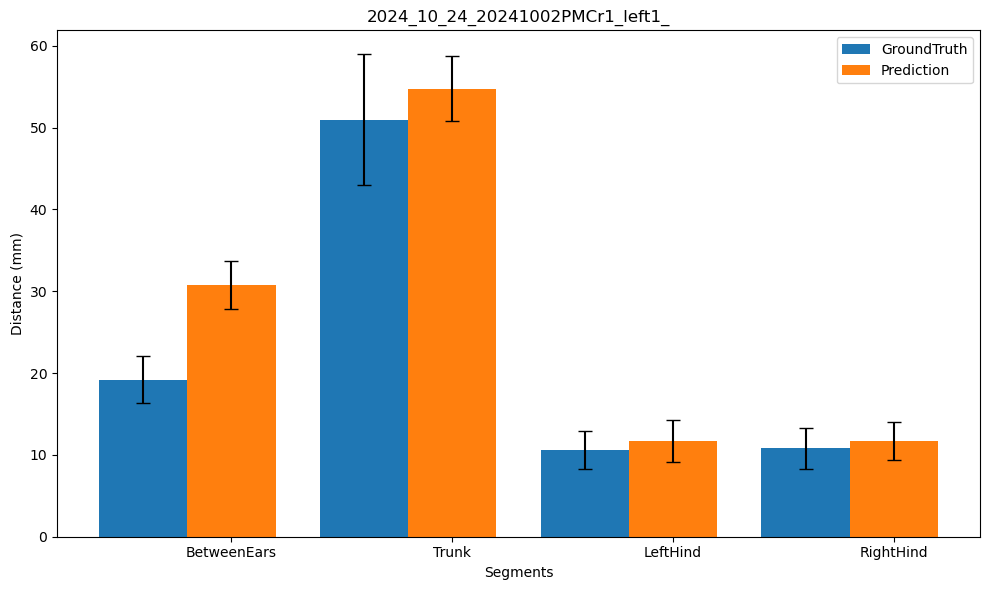

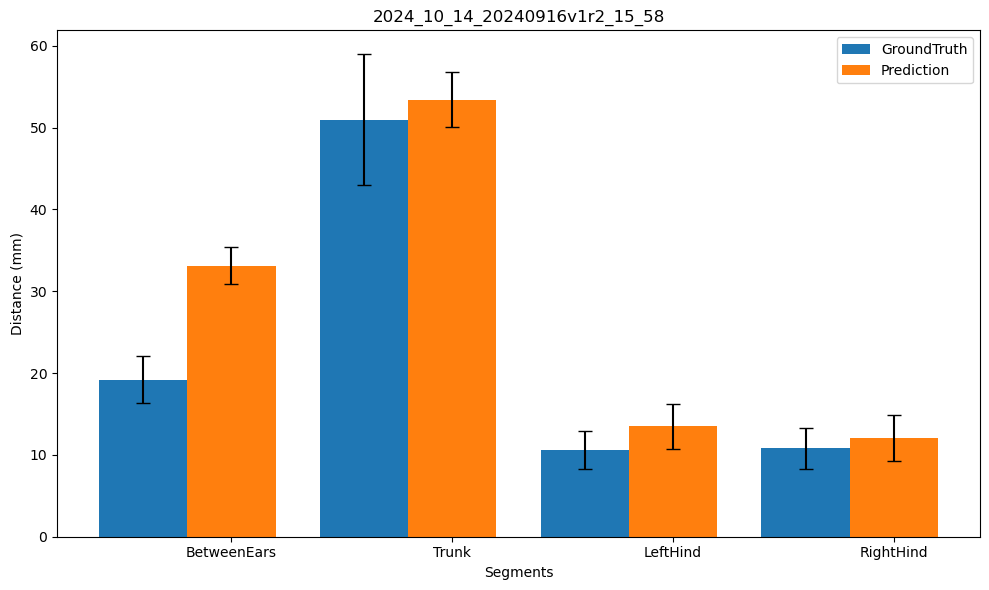

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17/DANNCE/predict00/vis/2024_11_13_20240910v1r_cricket_cyliner_test_16_17.jpg'.


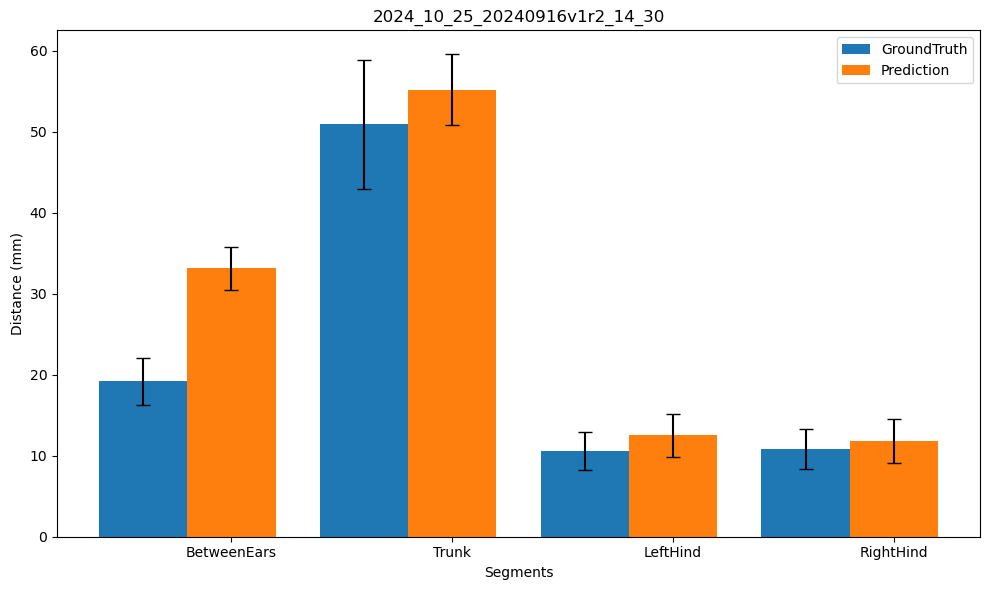

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_16_03/DANNCE/predict00/vis/2024_10_08_20240916v1r1_16_03.jpg'.


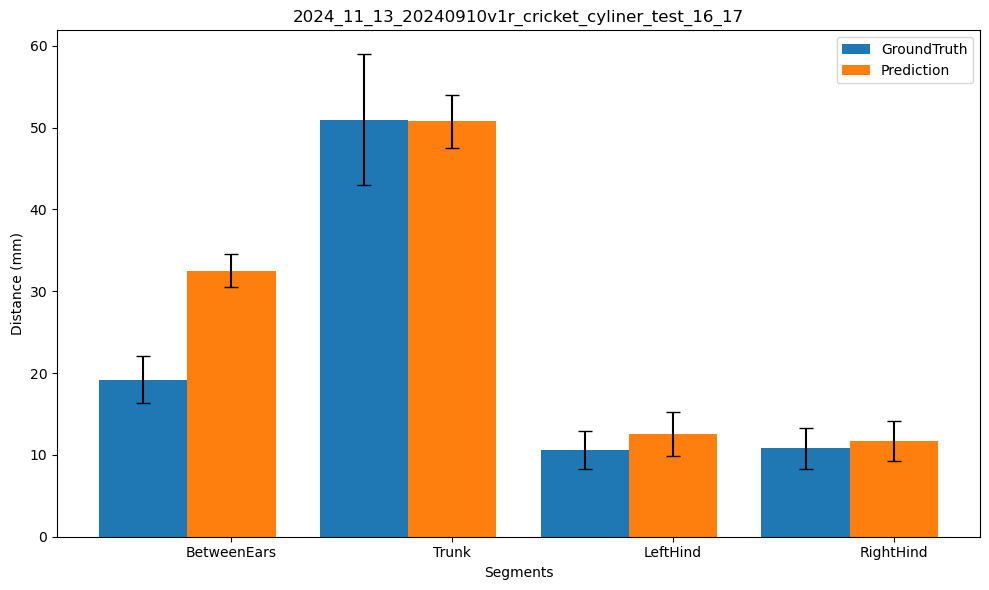

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_/DANNCE/predict00/vis/2024_10_24_202420717PMCr1_.jpg'.


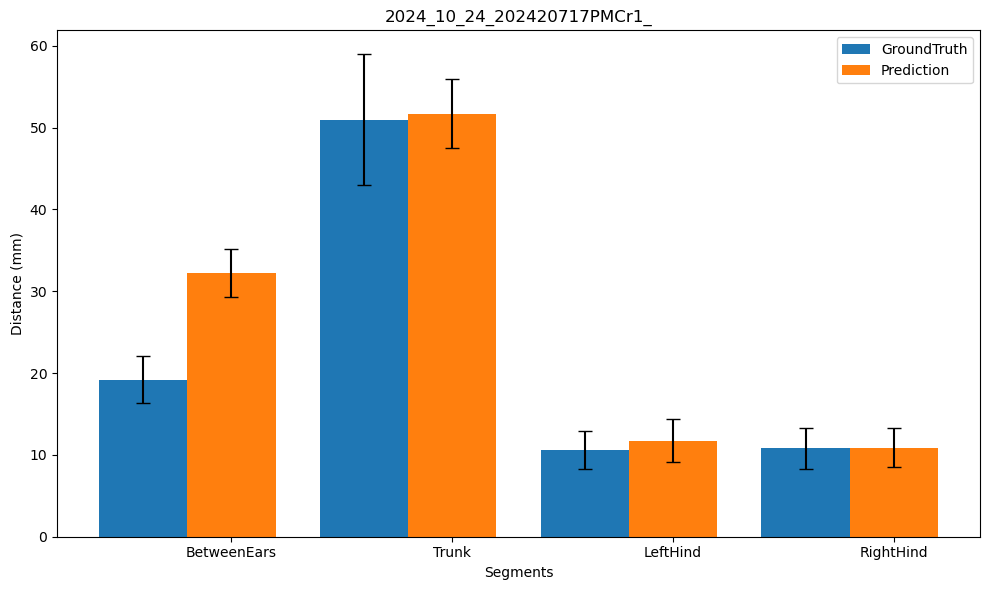

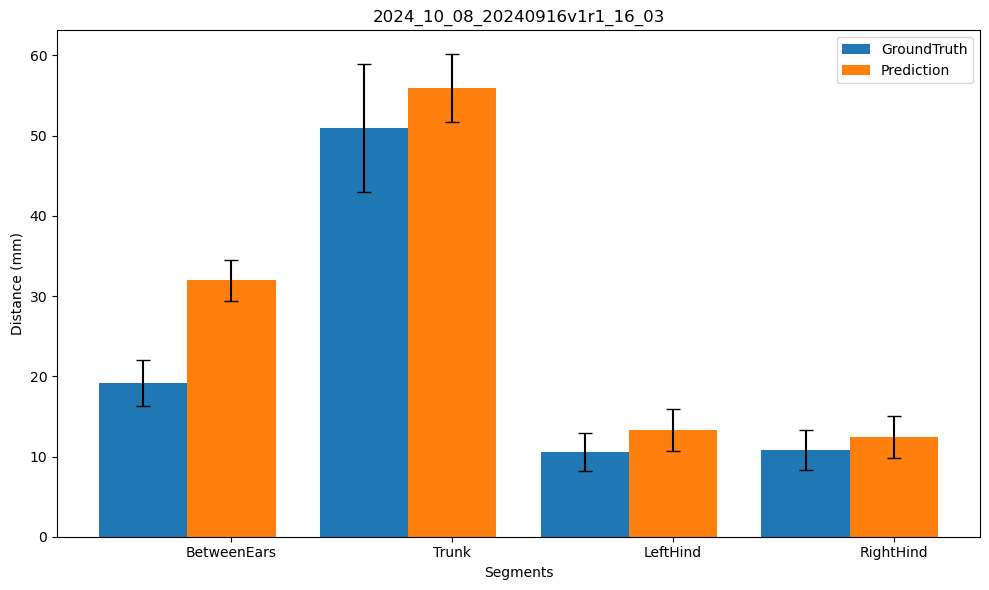

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/DANNCE/predict00/vis/2024_11_01_20240910V1r_AO_12_50.jpg'.


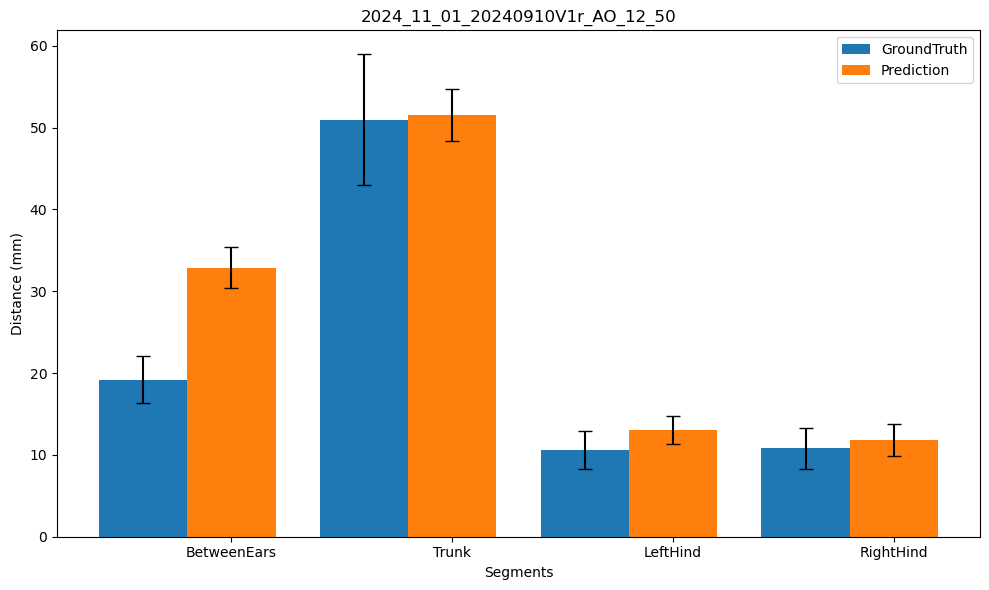

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25/DANNCE/predict00/vis/2024_10_17_20240819V1r1_14_25.jpg'.


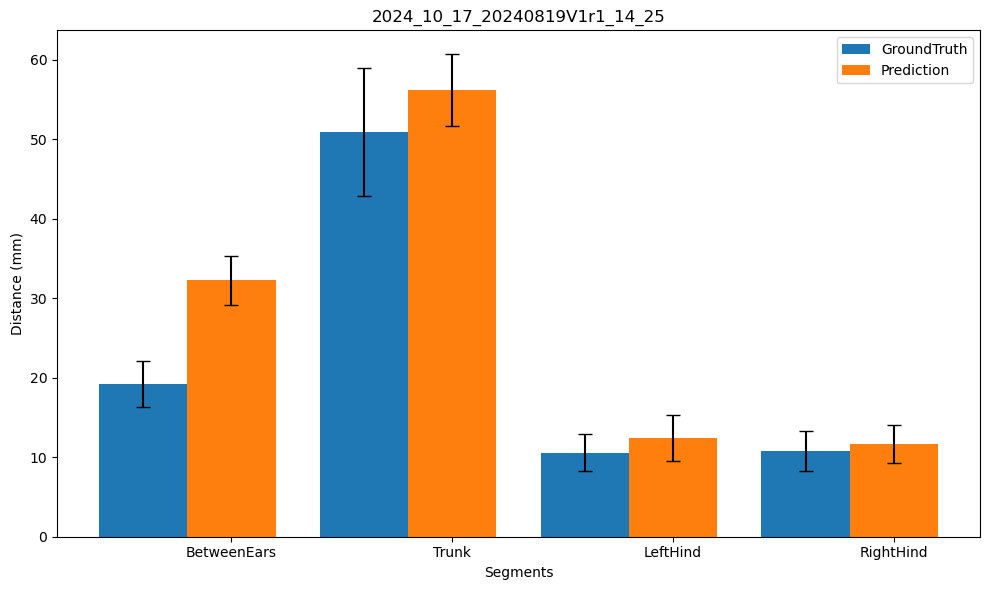

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53/DANNCE/predict00/vis/2024_10_14_20240916v1r1_14_53.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/240605pmc_righthole_cricket_acrylic_test_15_05/DANNCE/predict00/vis/2024_11_13_240605pmc_righthole_cricket_acrylic_test_15_05.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2/DANNCE/predict00/vis/2024_09_18_20240819_V1_r1_2.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17/DANNCE/predict00/vis/2024_10_08_20240819V1r1_20_17.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/DANNCE/predict00/vis/2024_10_14_20240916v1r1_16_53.jpg'.


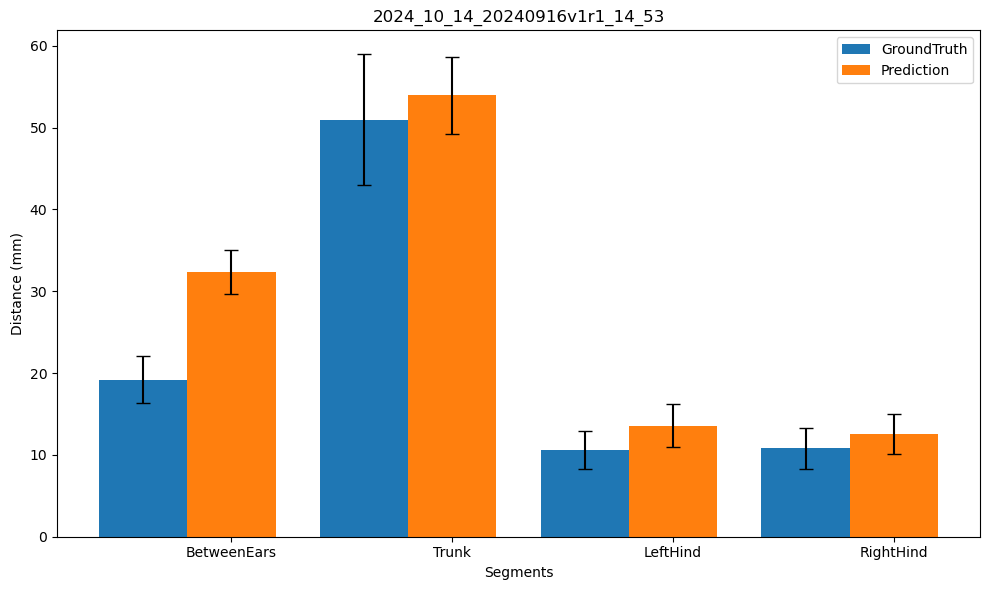

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_16_22/DANNCE/predict00/vis/2024_10_08_20240916v1r1_16_22.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/DANNCE/predict00/vis/2024_10_25_20241002PMCr2_17_05.jpg'.


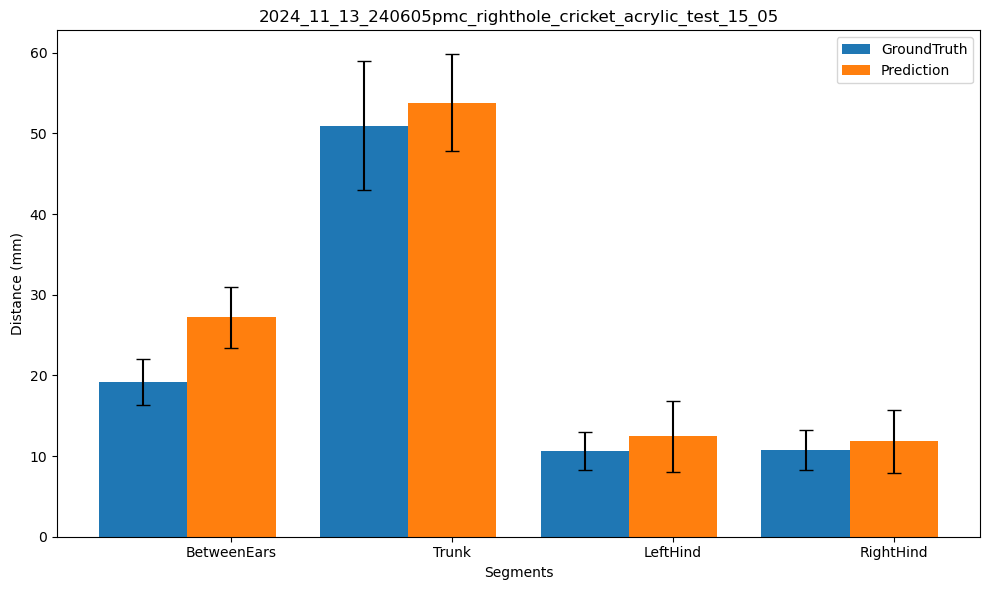

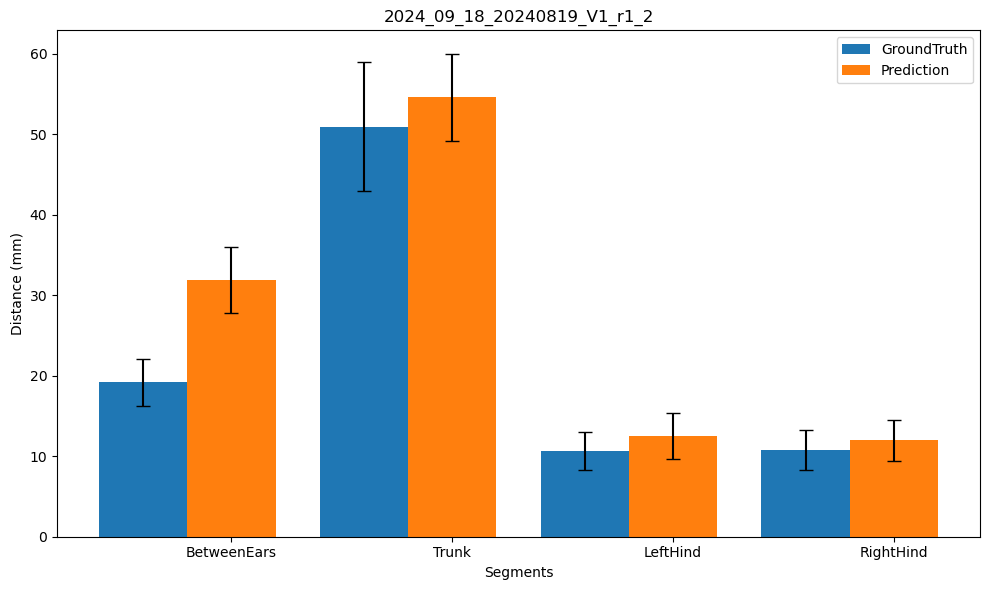

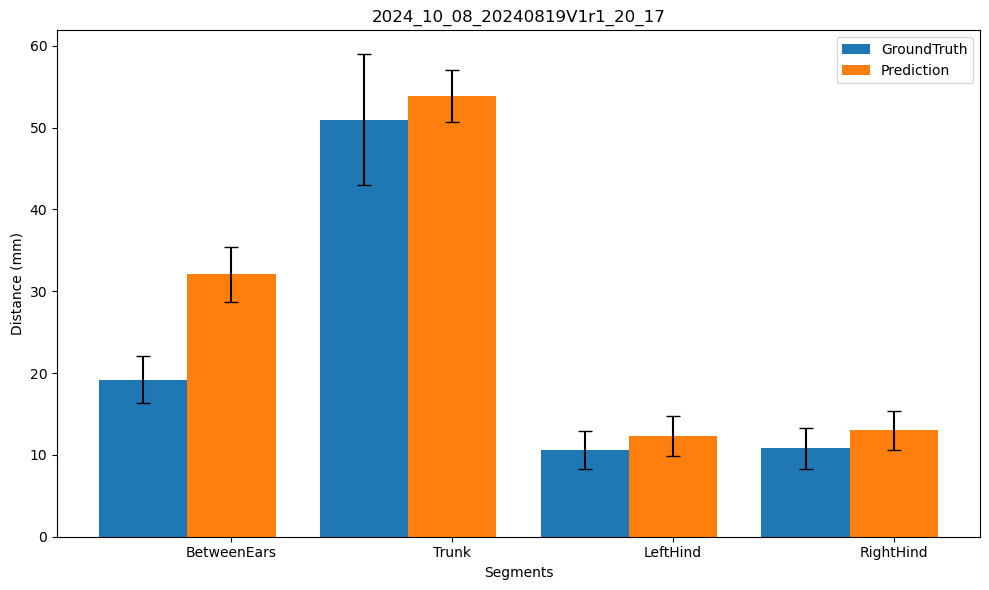

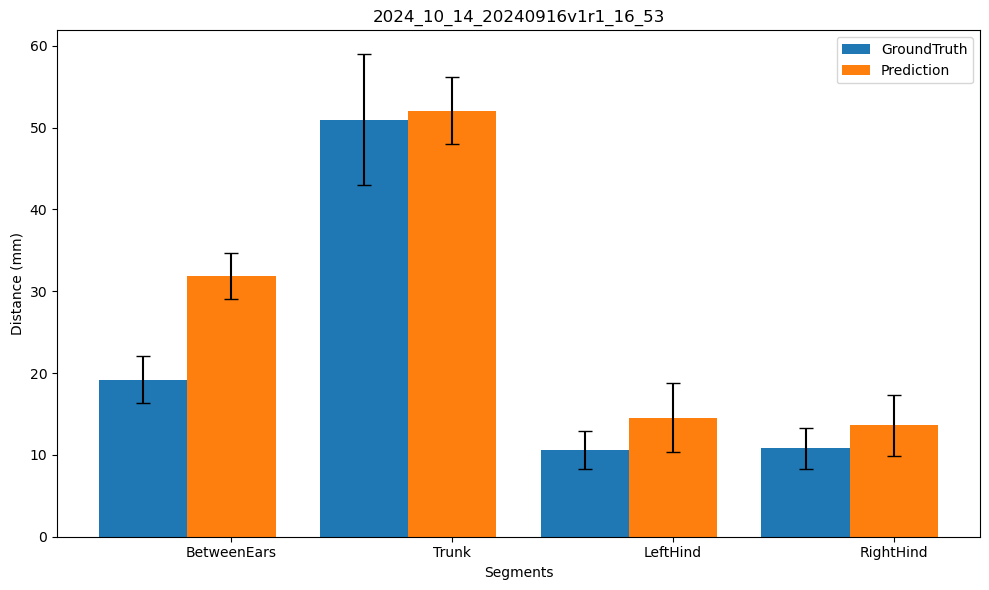

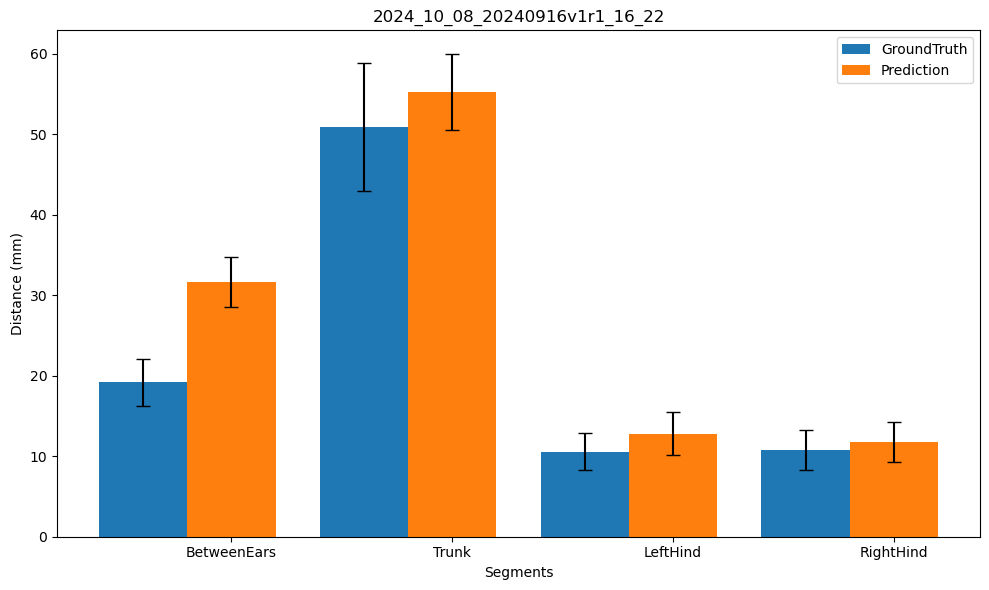

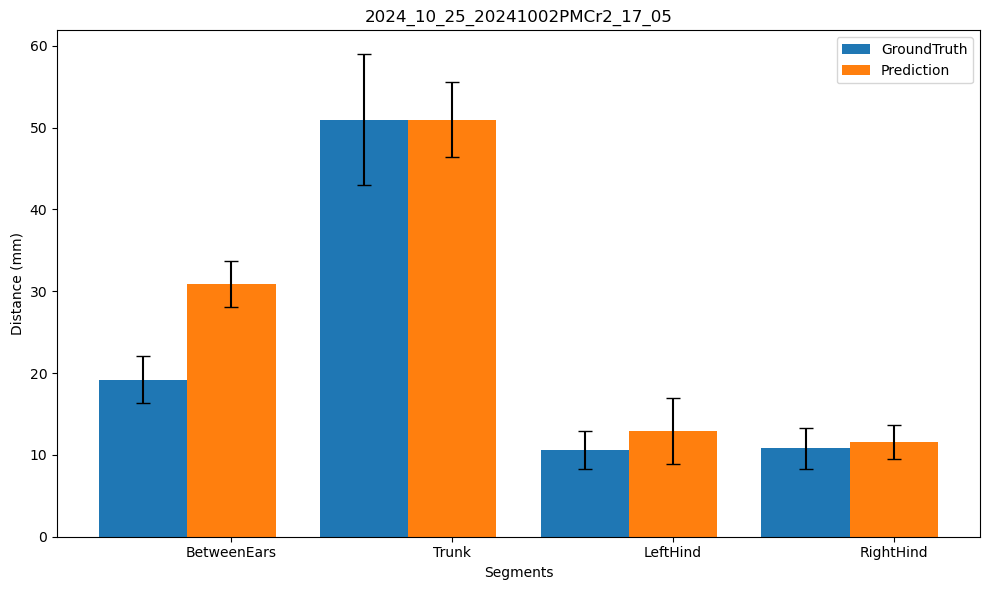

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/DANNCE/predict00/vis/2024_09_18_20240819_V1_r1.jpg'.


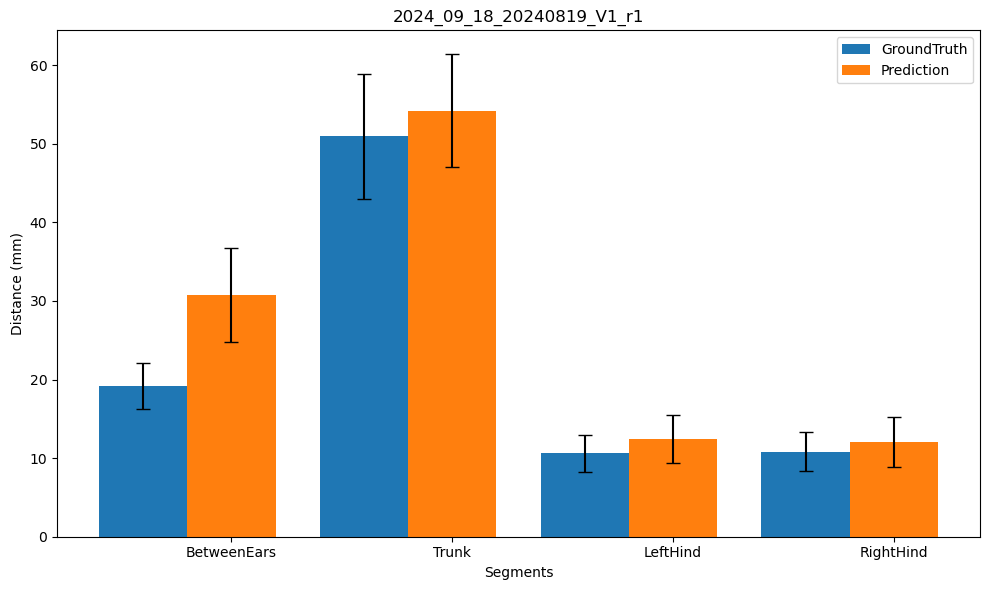

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1/DANNCE/predict00/vis/2024_10_04_20240819V1r1.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19/DANNCE/predict00/vis/2024_10_24_20241001PMCr2_16_19.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_40/DANNCE/predict00/vis/2024_10_17_20240819V1r1_14_40.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1/DANNCE/predict00/vis/2024_10_04_20240916V1r1.jpg'.


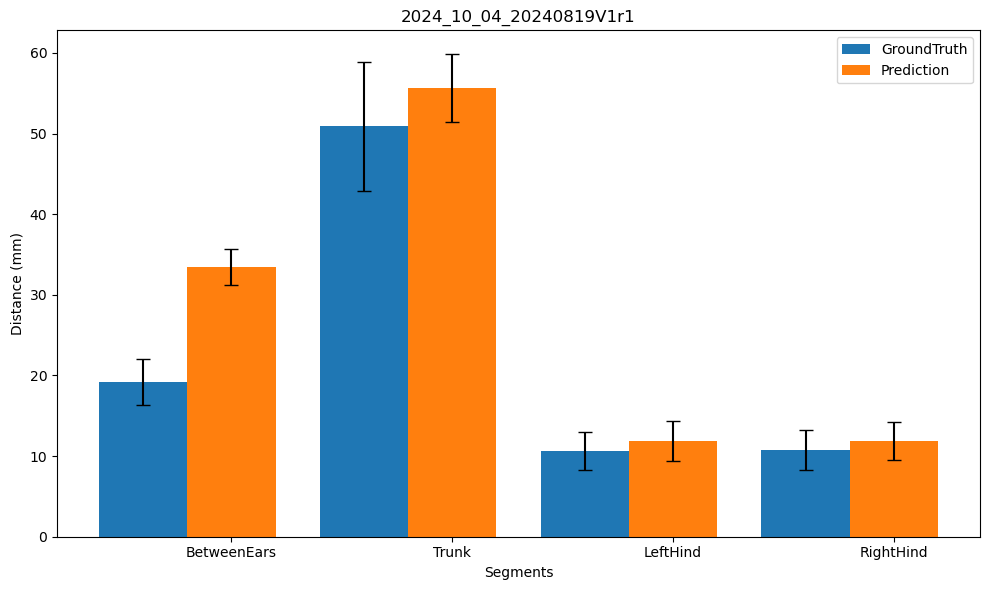

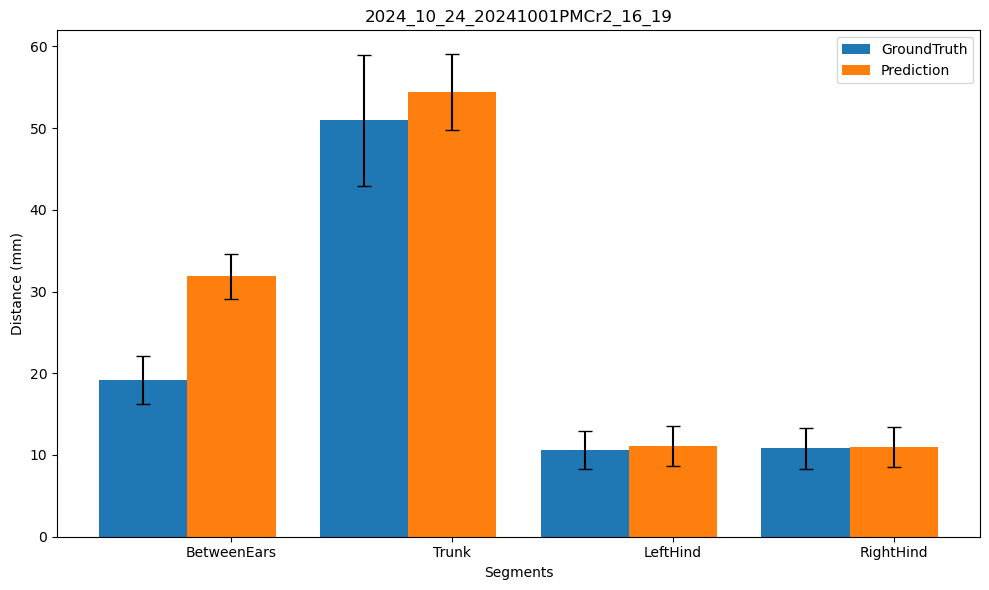

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12/DANNCE/predict00/vis/2024_11_06_20241015pmcr1_16_12.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/DANNCE/predict00/vis/2024_10_14_20240916v1r2_14_30.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/DANNCE/predict00/vis/2024_11_06_20241015pmcr2_16_53.jpg'.


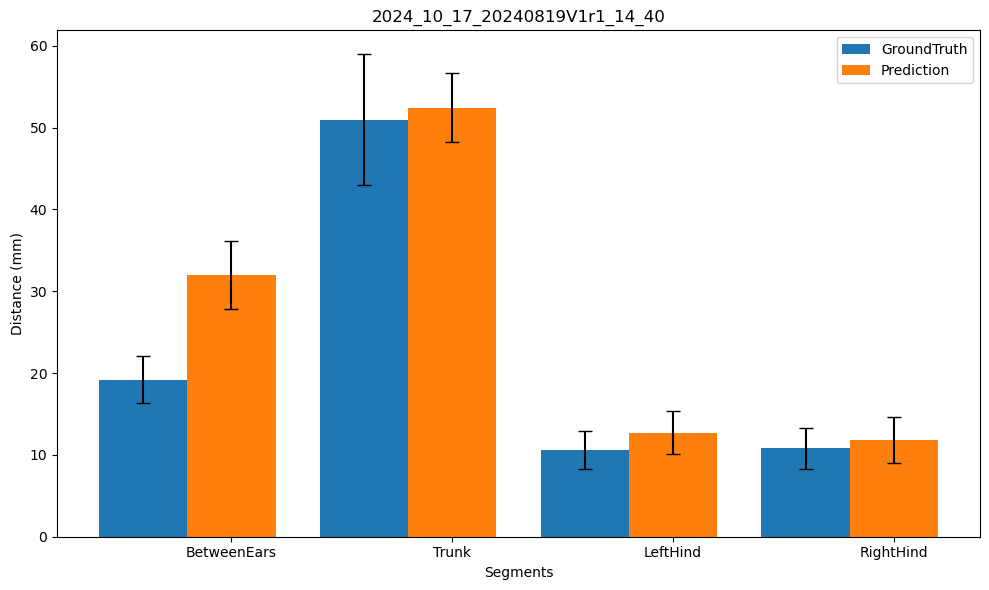

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/DANNCE/predict00/vis/2024_10_14_20240916v1r1_16_37.jpg'.


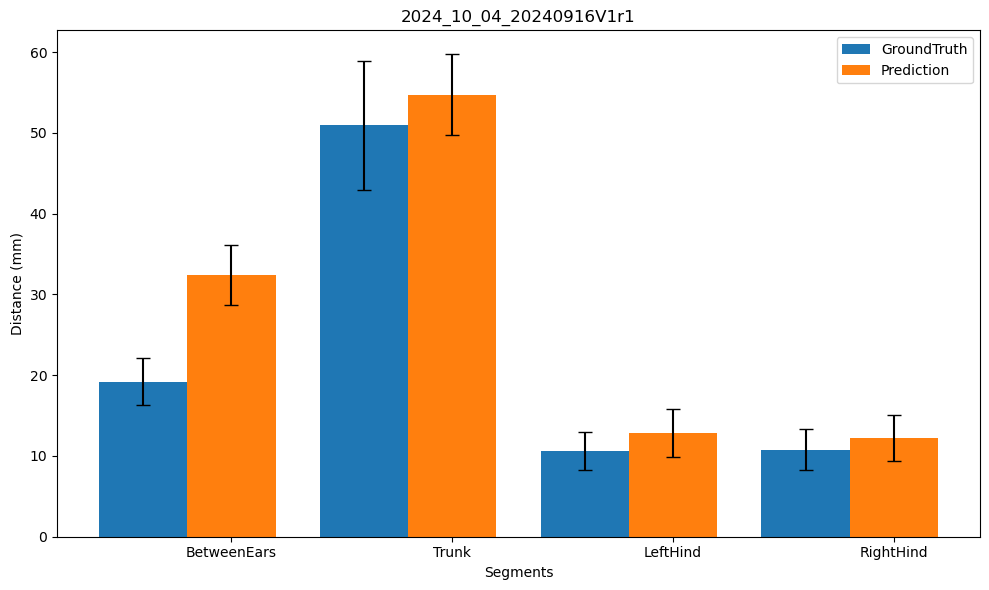

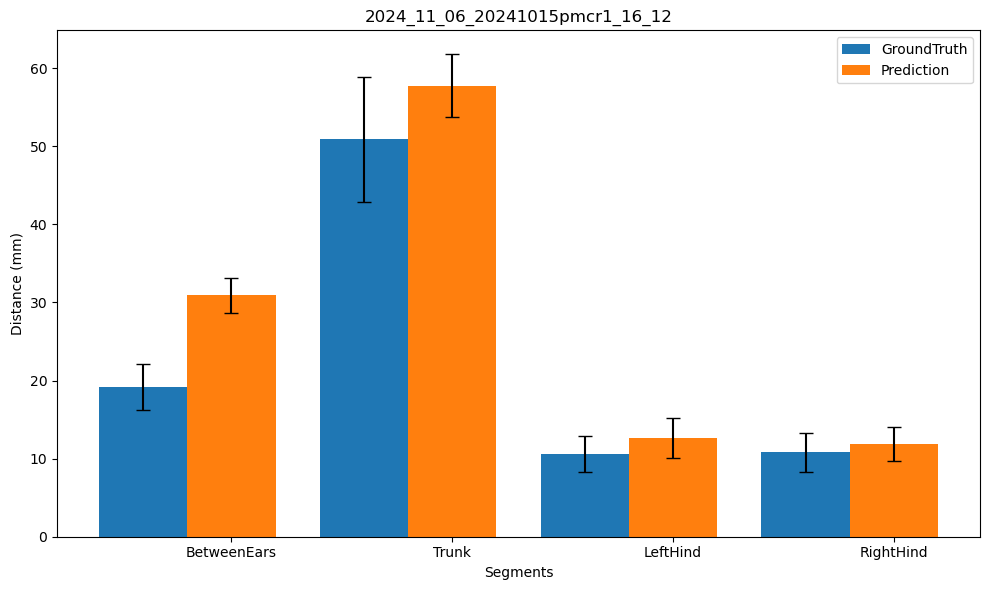

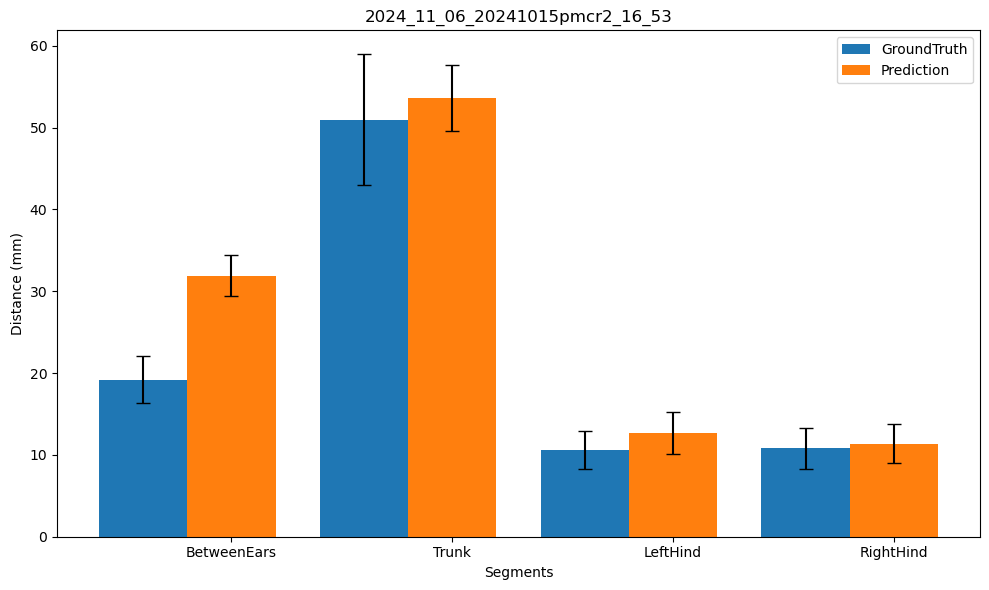

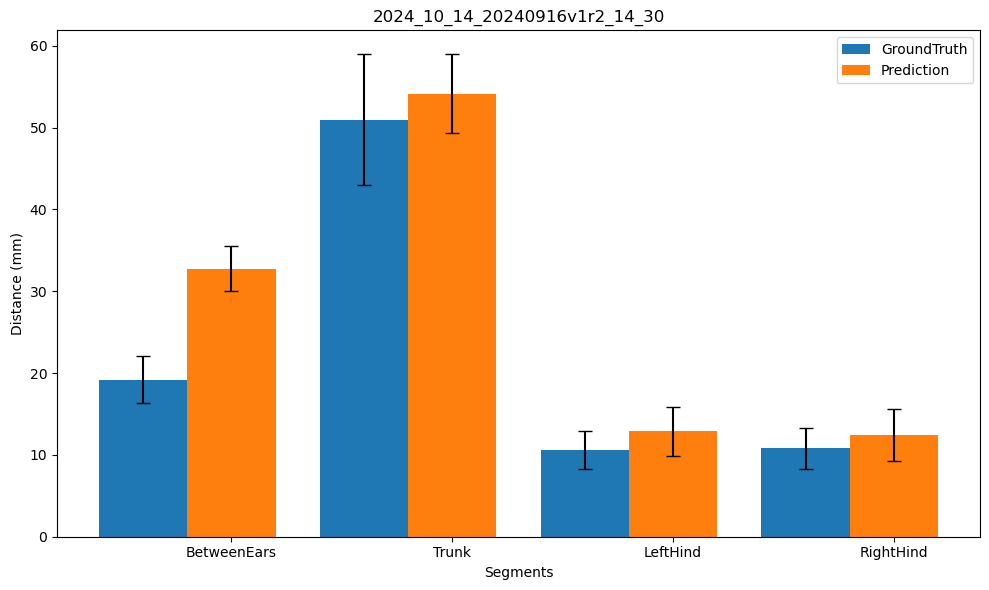

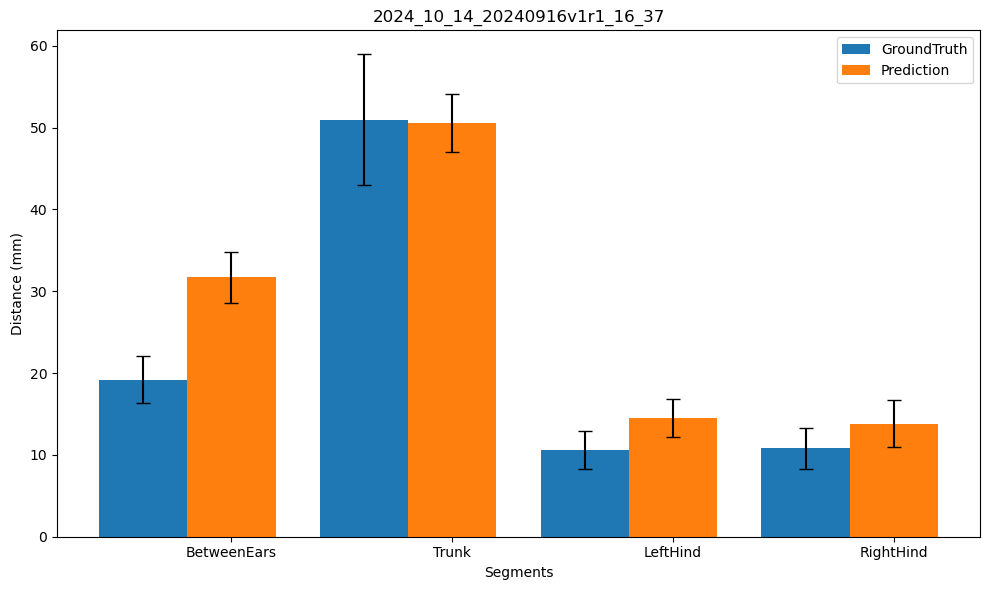

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40/DANNCE/predict00/vis/2024_10_04_20240819V1r1_21_40.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20/DANNCE/predict00/vis/2024_10_08_20240916v1r1_14_20.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32/DANNCE/predict00/vis/2024_10_08_20240819V1r1_20_32.jpg'.


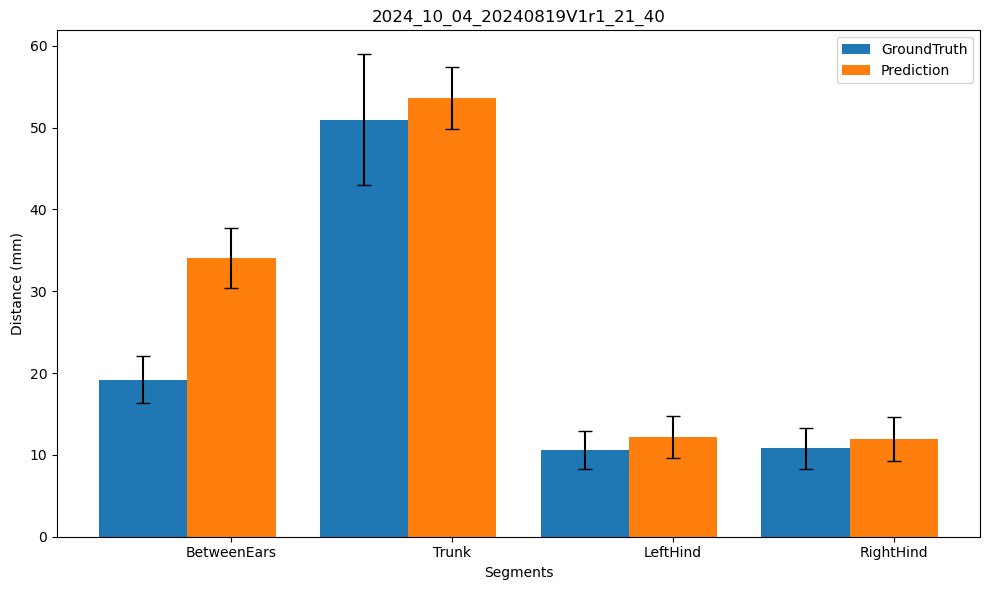

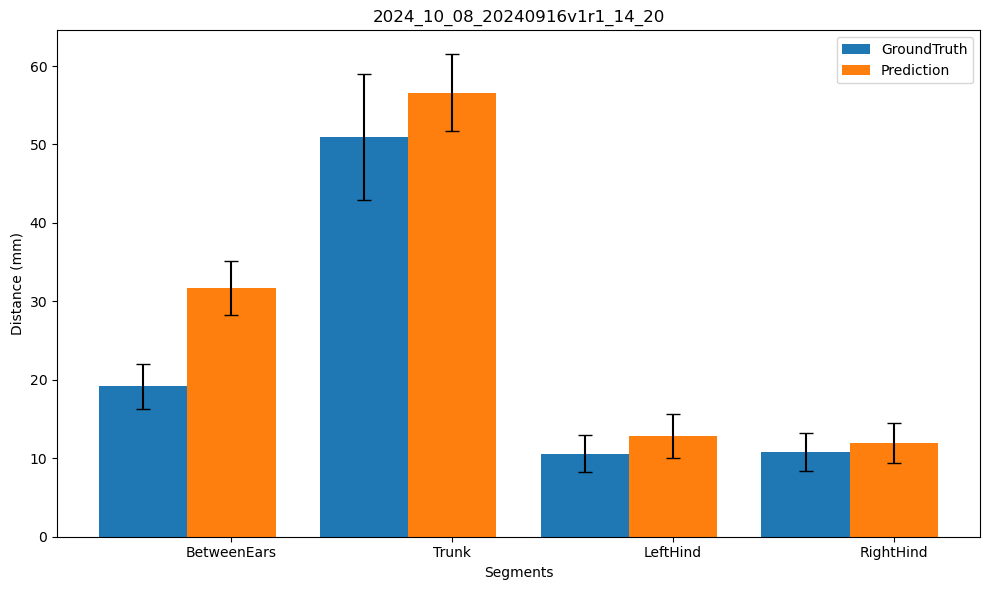

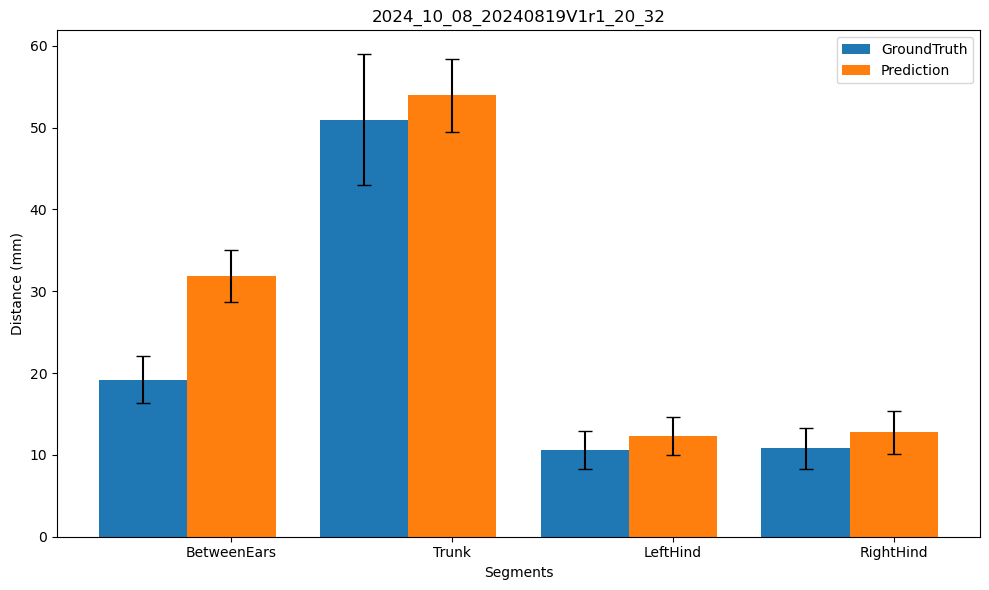

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10/DANNCE/predict00/vis/2024_10_04_20240819V1r1_20_10.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37/DANNCE/predict00/vis/2025_02_13_20241225PMCLE1mini_11_37.jpg'.


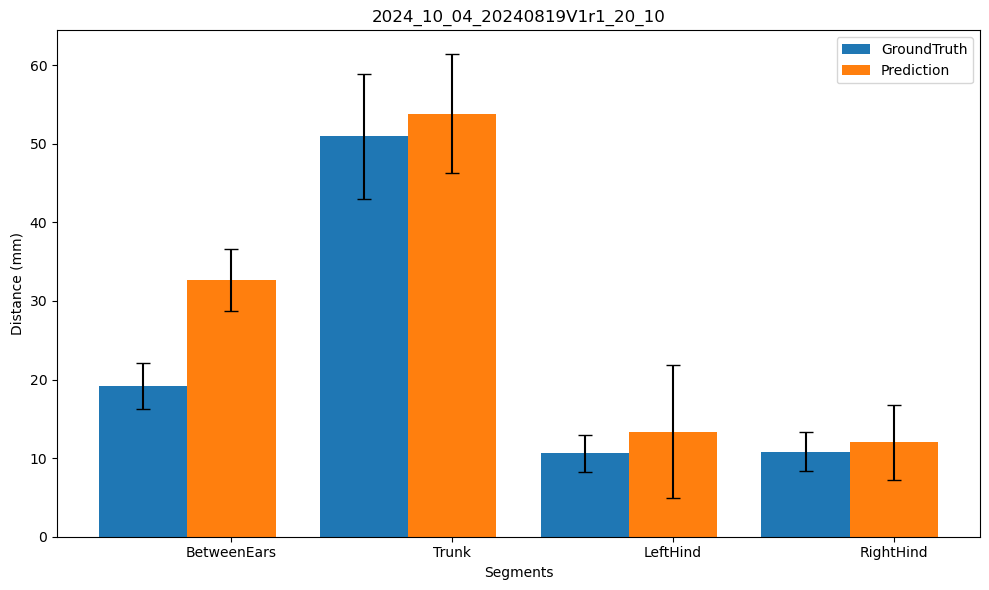

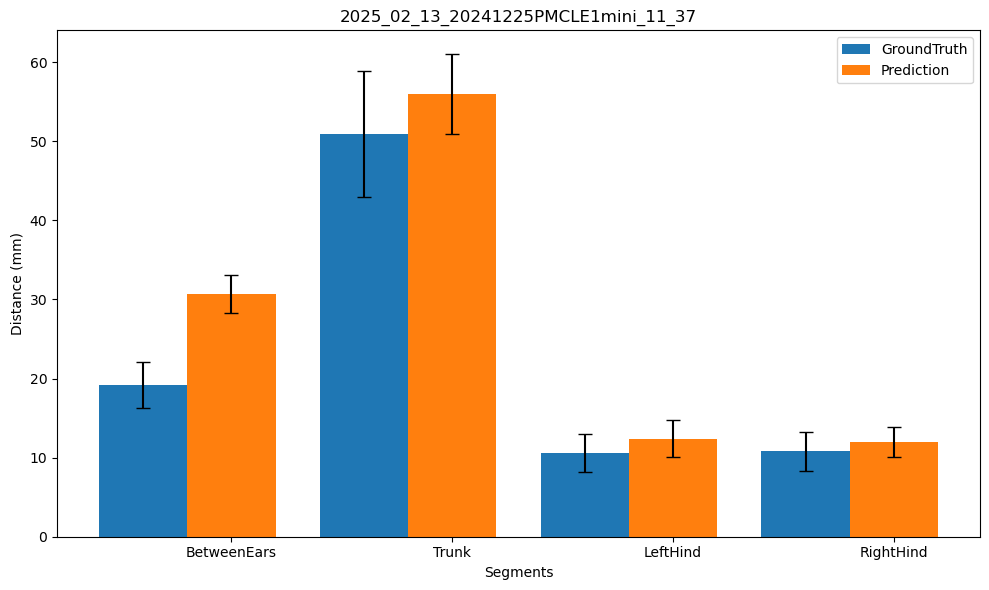

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07/DANNCE/predict00/vis/2024_10_24_20241001PMCr2_15_07.jpg'.


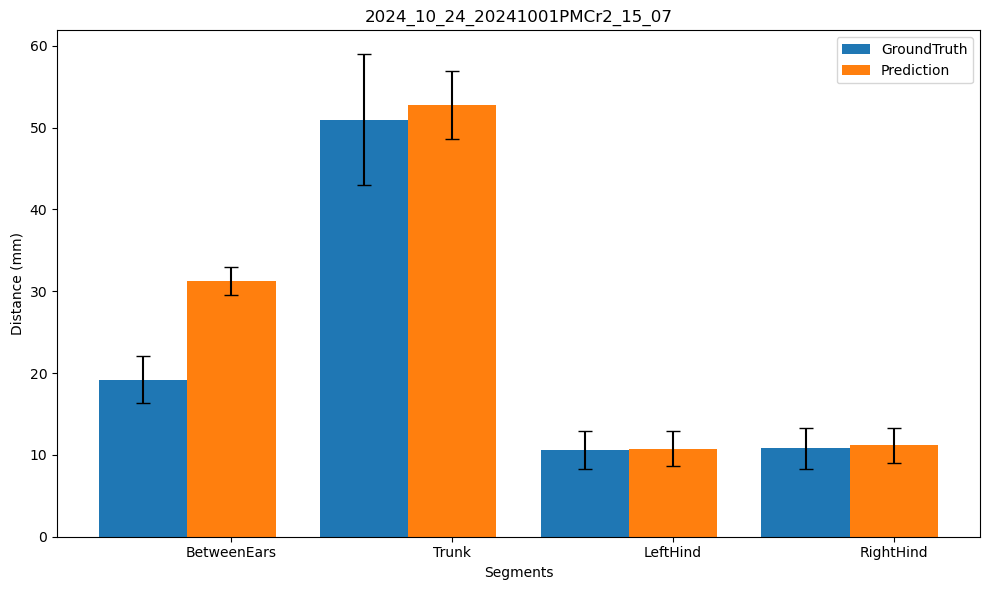

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53/DANNCE/predict00/vis/2025_05_16_20240303PMCBE0r1coated_14_53.jpg'.


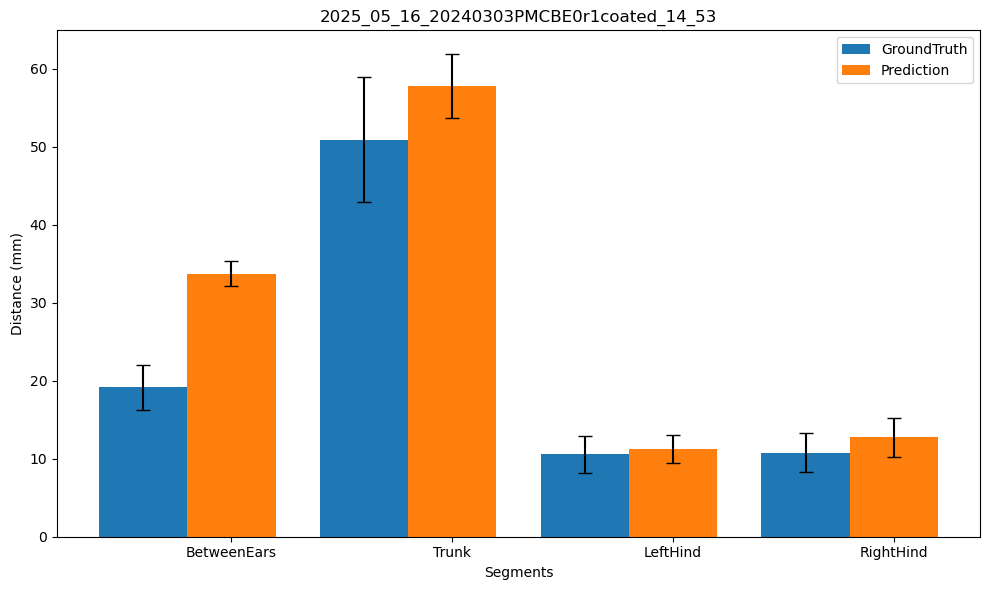

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13/DANNCE/predict00/vis/2024_11_06_20241015pmcr2_17_13.jpg'.


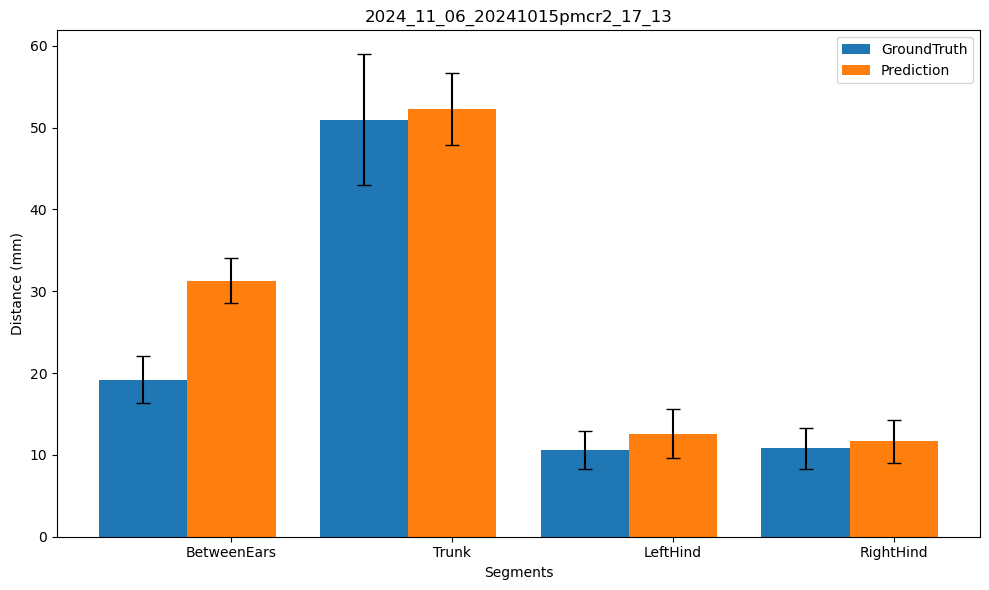

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24/DANNCE/predict00/vis/2025_02_27_20241015PMCBE1mini_12_24.jpg'.


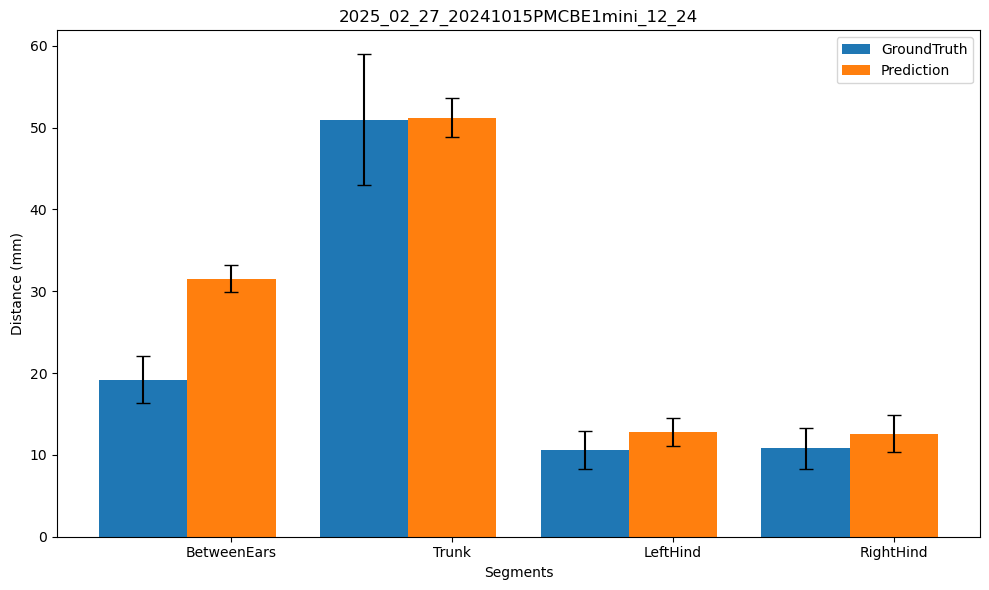

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_25/DANNCE/predict00/vis/2024_10_25_20241002PMCr2_16_25.jpg'.


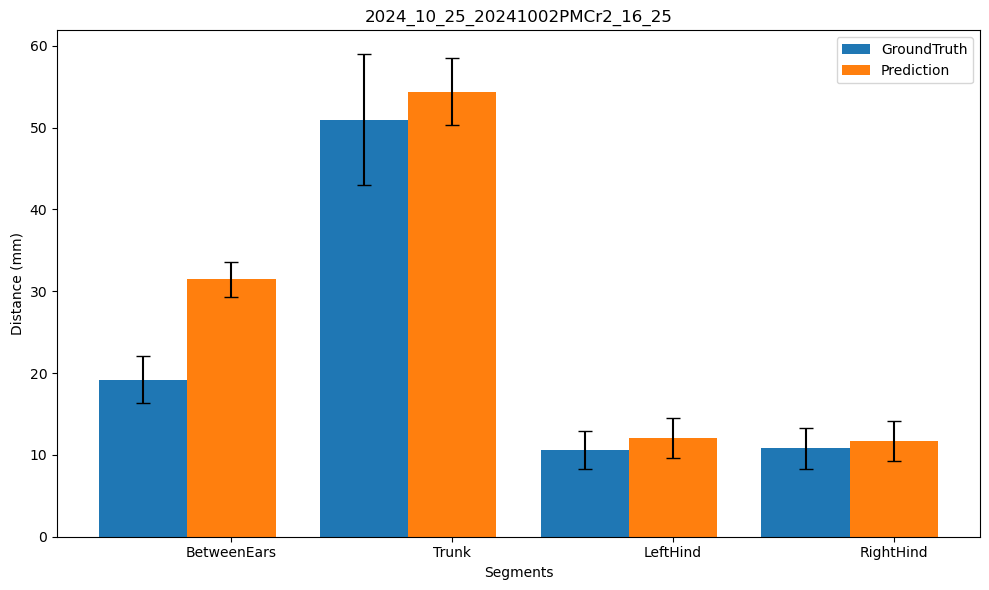

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated/DANNCE/predict00/vis/2025_05_16_20240303PMCBE0r1coated.jpg'.


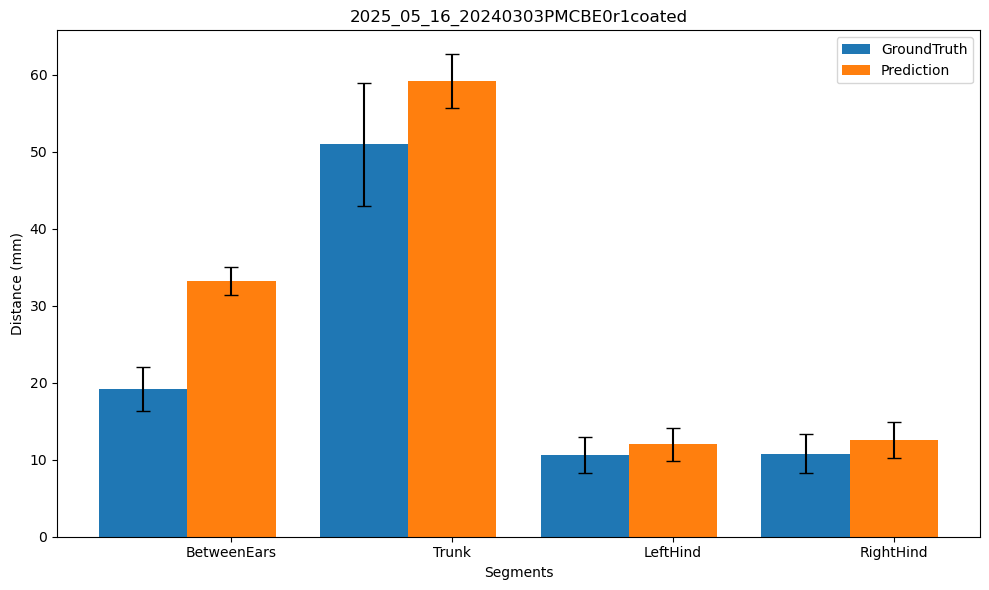

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F/DANNCE/predict00/vis/2025_05_16_20241216V1RE1F.jpg'.


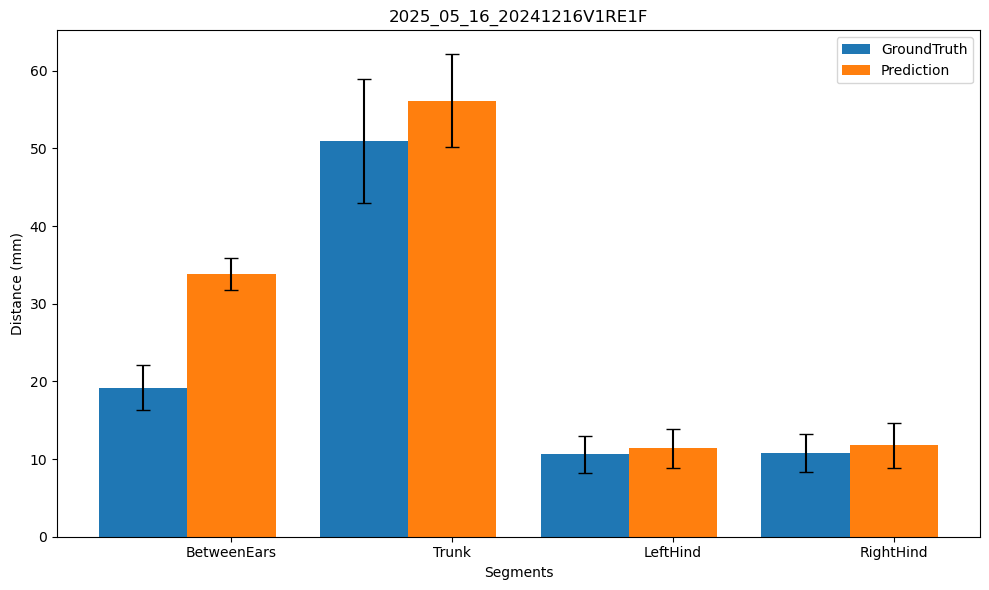

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45/DANNCE/predict00/vis/2025_05_01_20250324PMCB_14_45.jpg'.


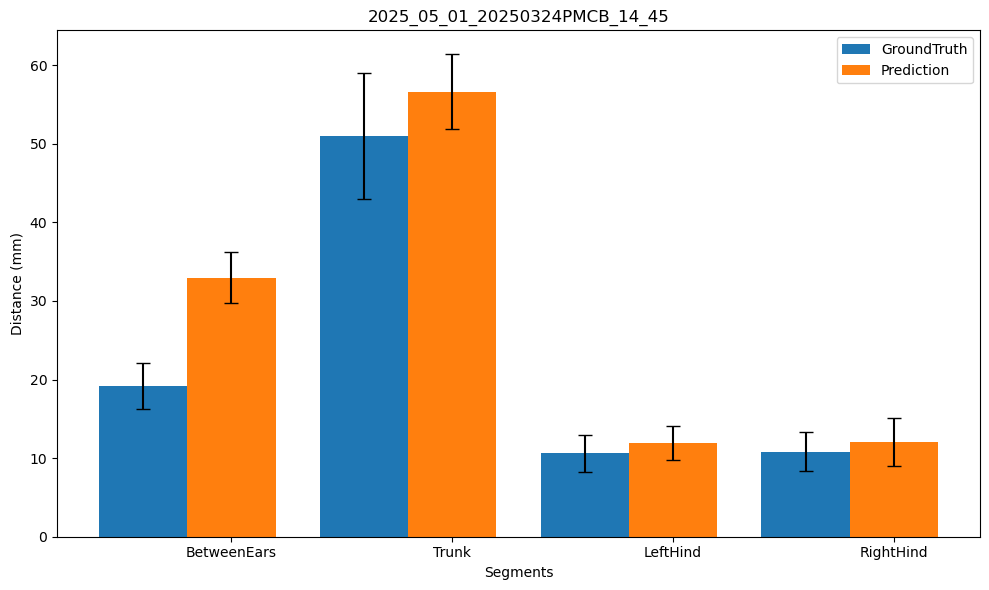

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44/DANNCE/predict00/vis/2024_10_08_20240819V1r1_19_44.jpg'.


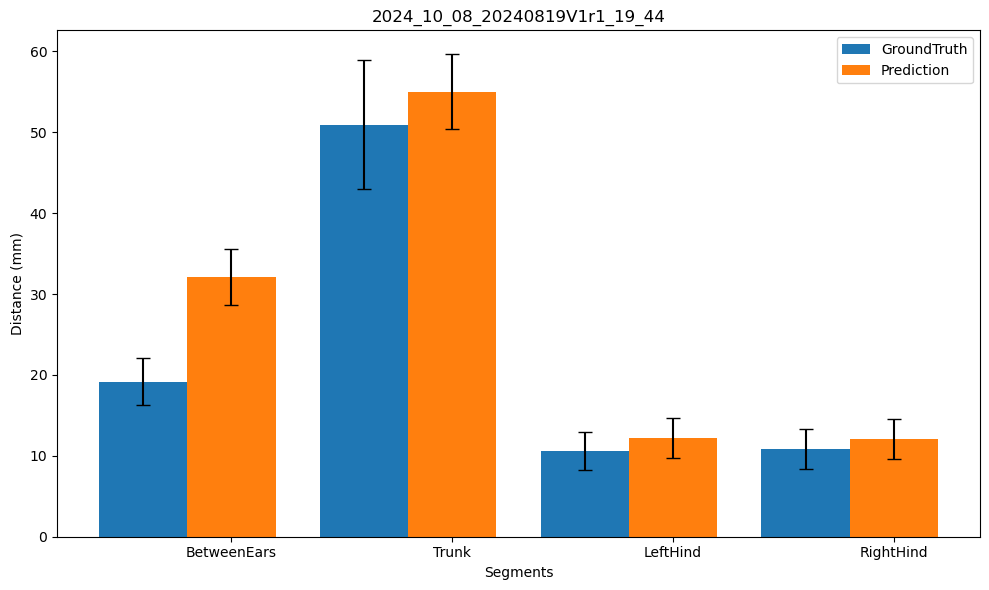

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB/DANNCE/predict00/vis/2025_05_14_20250324PMCB.jpg'.


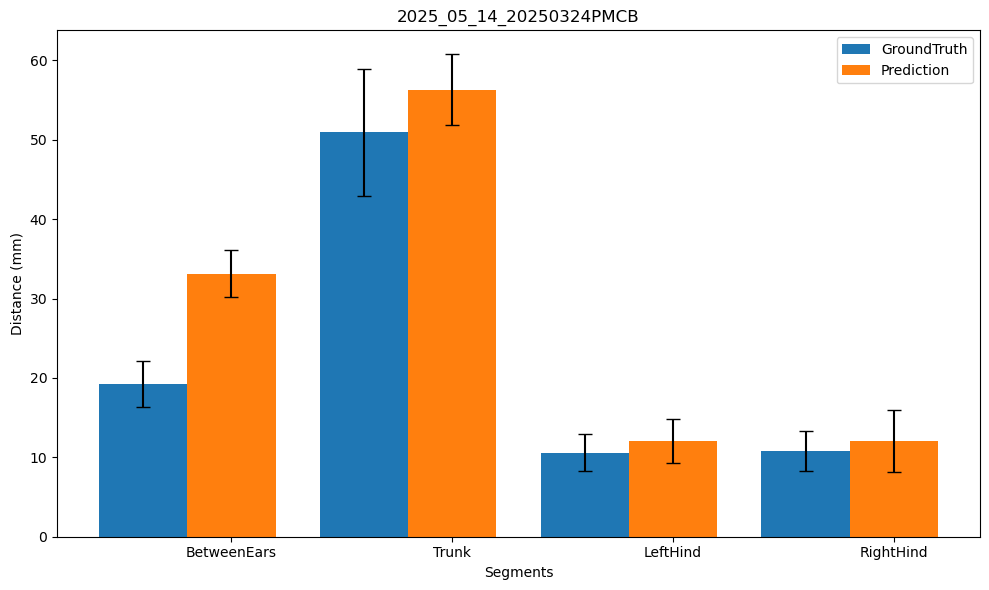

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0/DANNCE/predict00/vis/2025_05_14_20240324PMCBE0.jpg'.


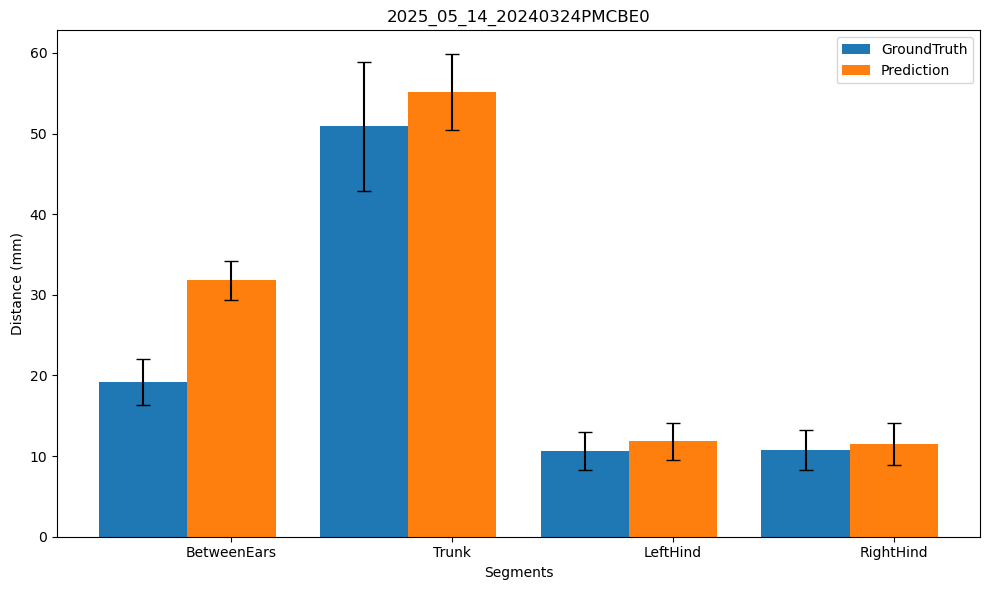

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12/DANNCE/predict00/vis/2025_03_11_20241224PMCLE1_14_12.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_13_09/DANNCE/predict00/vis/2024_12_18_20240919v1l5r2mini_13_09.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min/DANNCE/predict00/vis/2024_10_07_20240916v1r1_15_05_30min.jpg'.


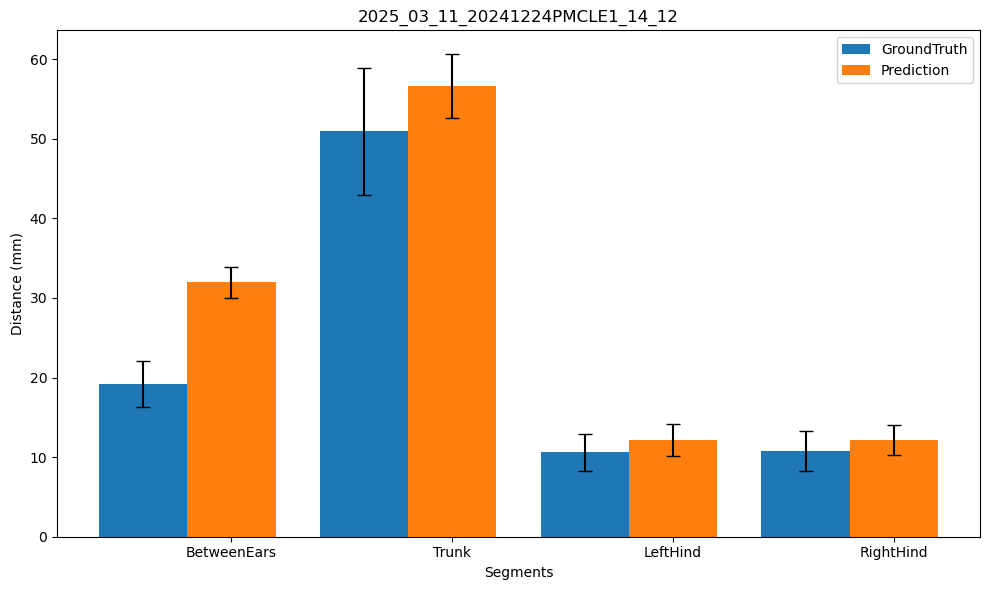

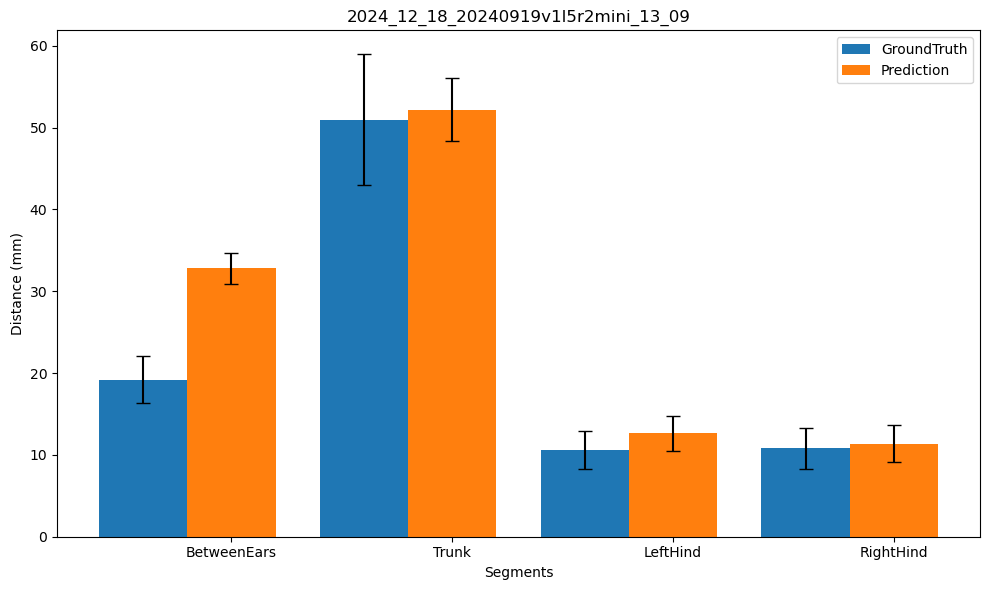

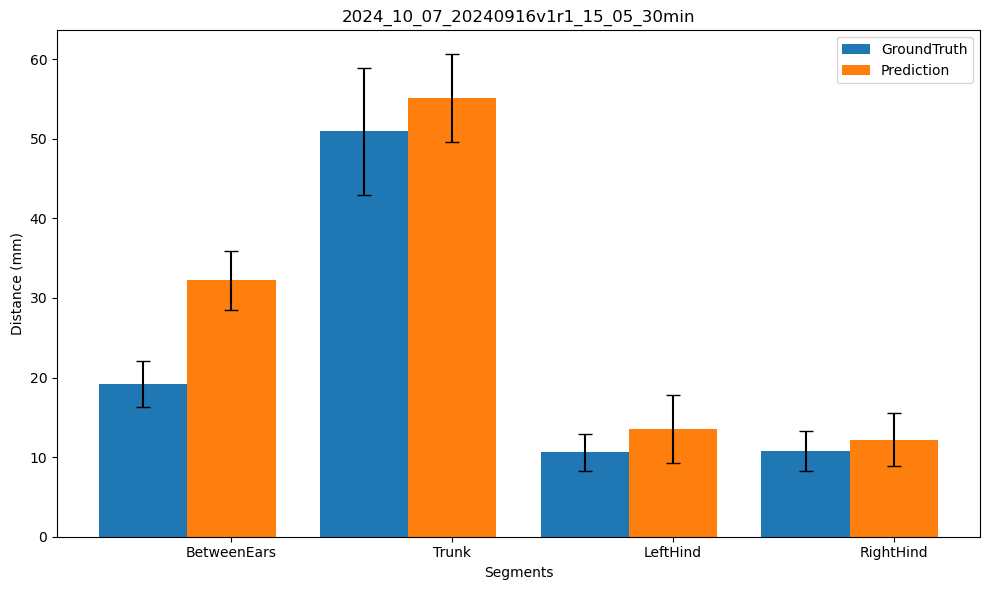

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/DANNCE/predict00/vis/2024_11_01_20240910V1r_BO_11_35.jpg'.


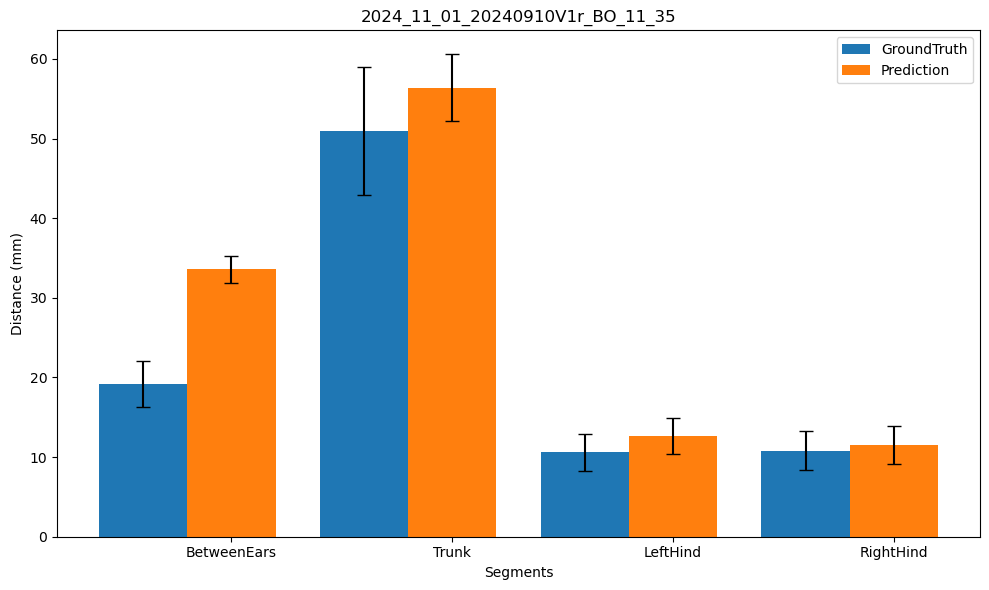

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23F/DANNCE/predict00/vis/2025_04_10_20241212V1RE1L23F.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35/DANNCE/predict00/vis/2025_02_12_20241001PMCRE2mini_15_35.jpg'.


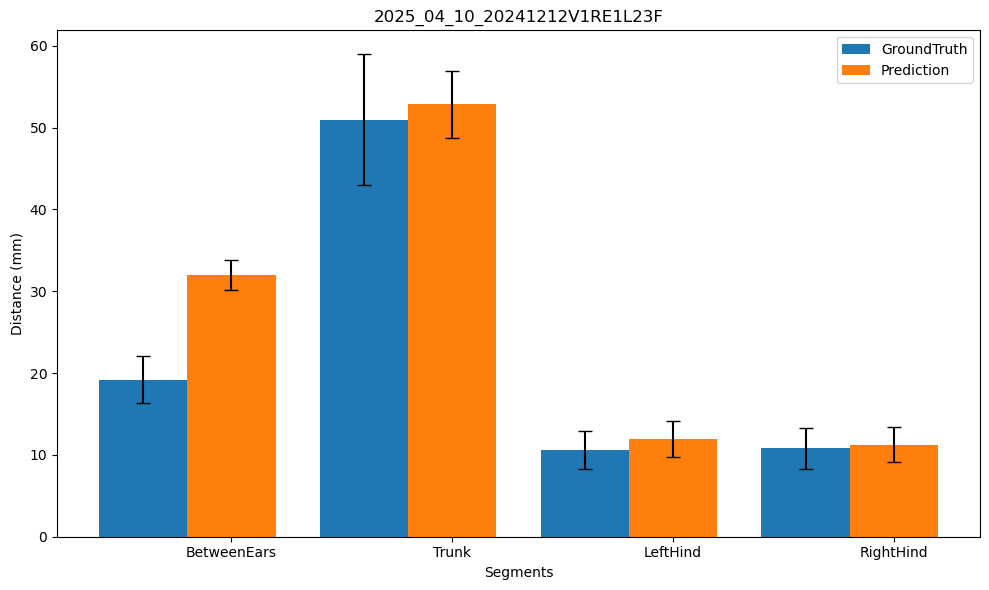

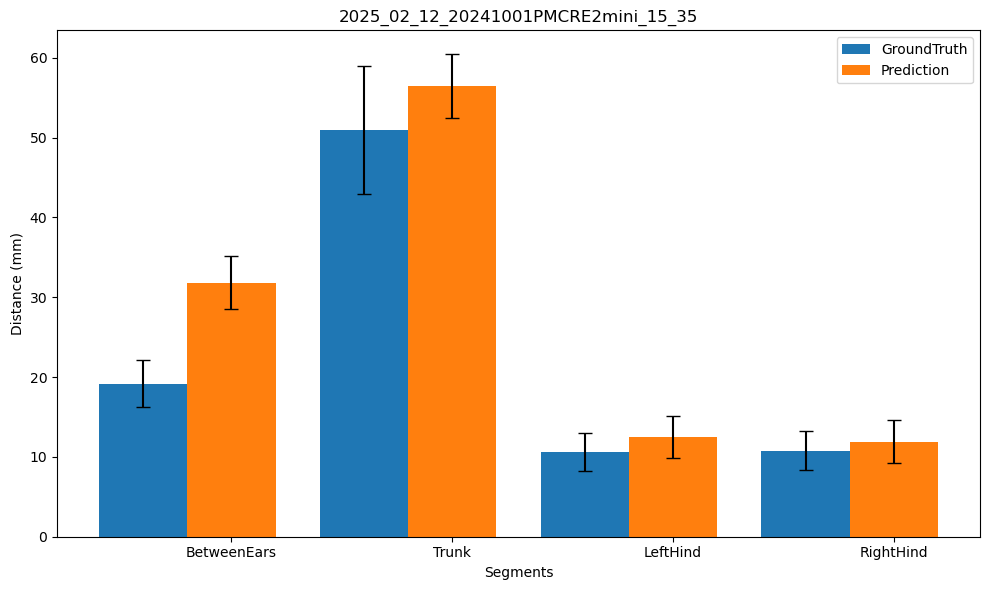

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57/DANNCE/predict00/vis/2025_02_13_20241225PMCLE1mini_11_57.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/DANNCE/predict00/vis/2025_05_21_20241217v1l23re1.jpg'.


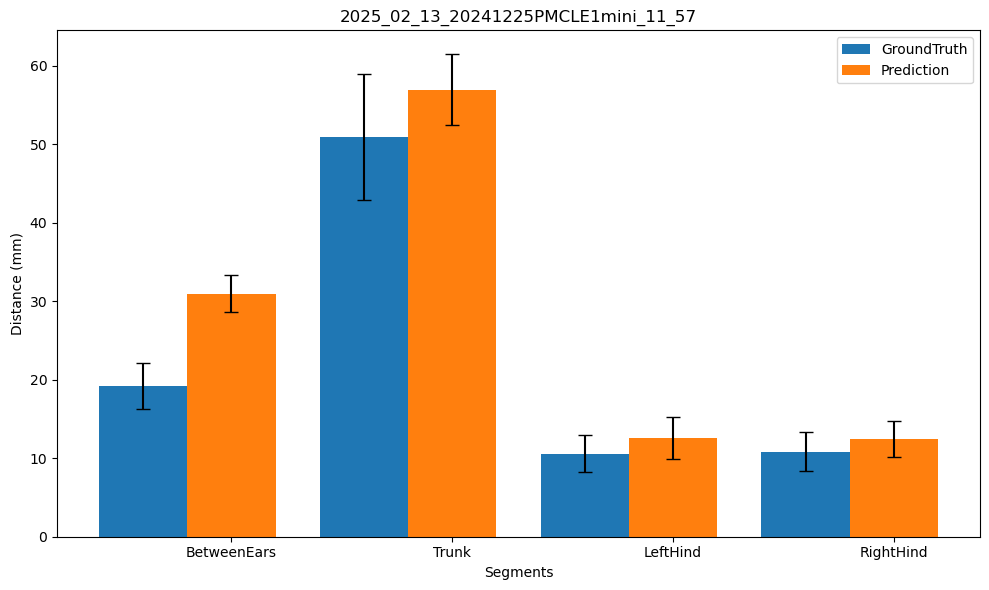

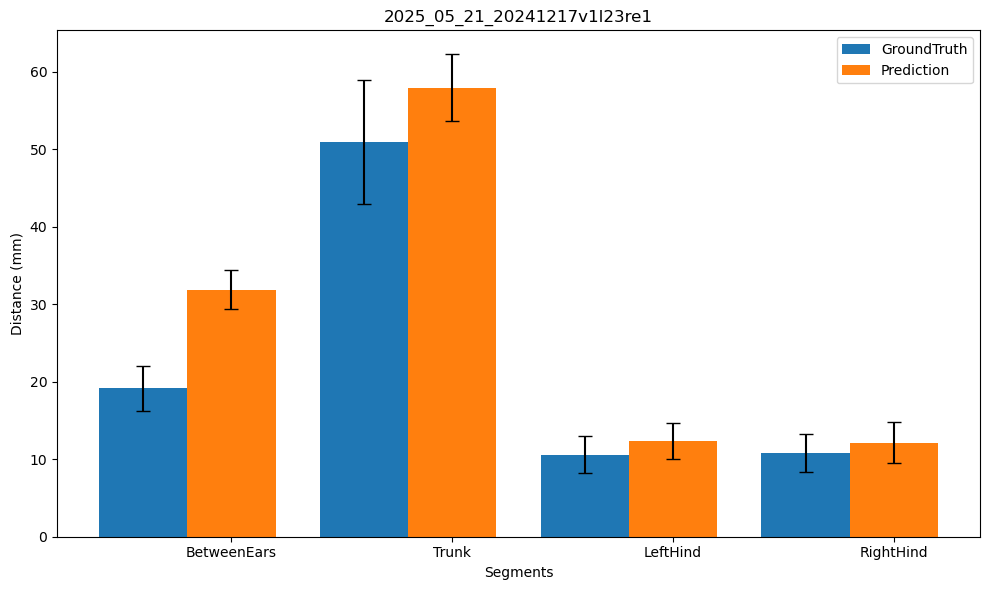

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16/DANNCE/predict00/vis/2025_05_16_20241216V1RE1F_15_16.jpg'.


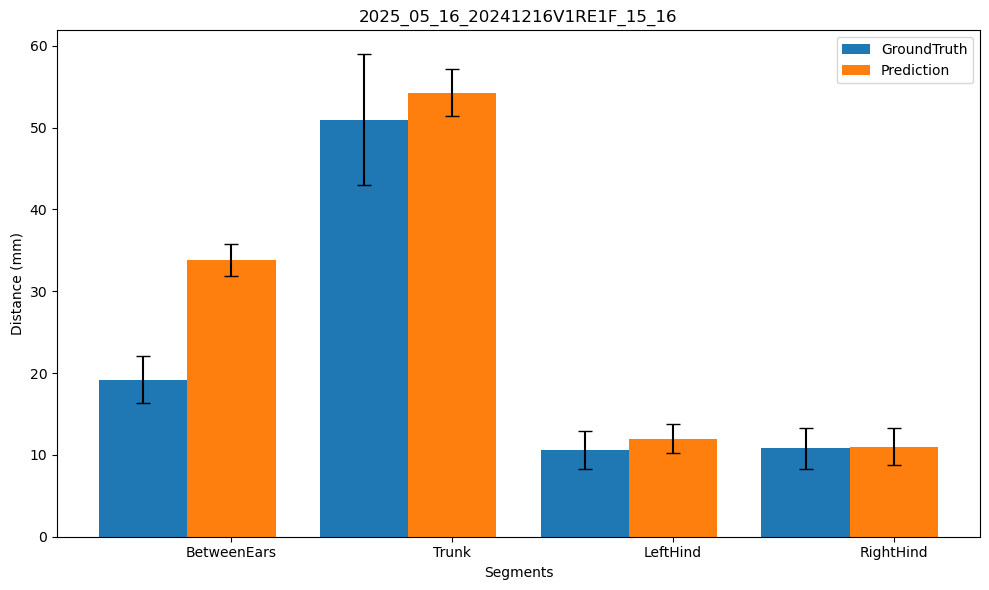

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41/DANNCE/predict00/vis/2024_10_17_20240819V1r1_13_41.jpg'.


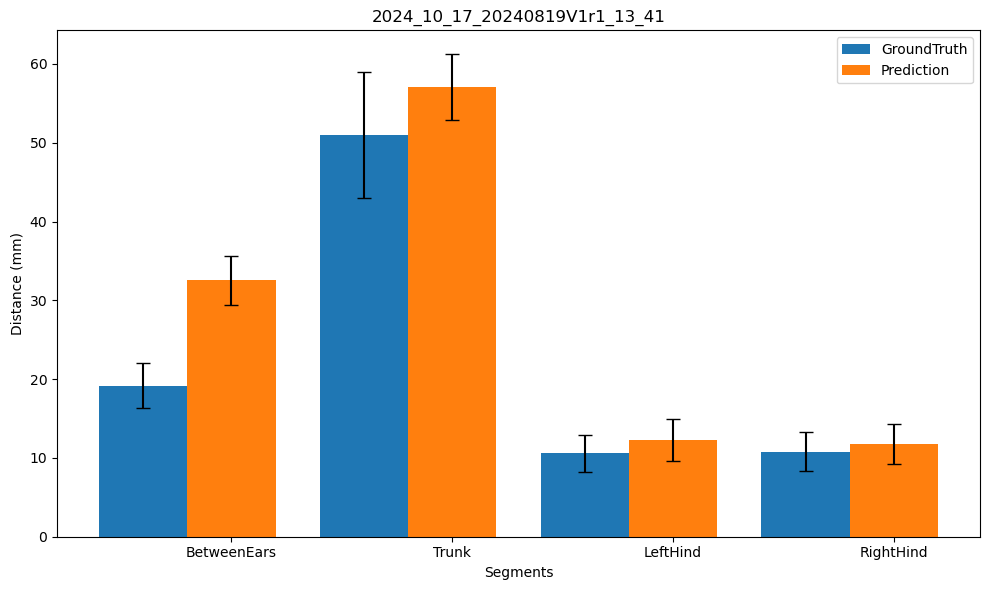

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F/DANNCE/predict00/vis/2025_05_07_20241216V1RE1F.jpg'.


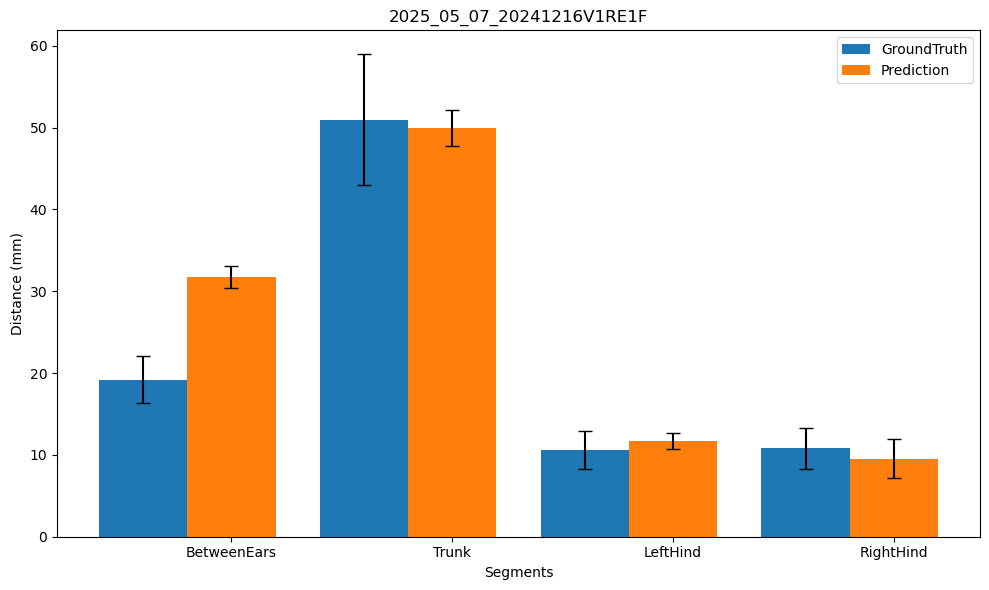

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52/DANNCE/predict00/vis/2024_11_07_20241015pmcr2_AO_12_52.jpg'.


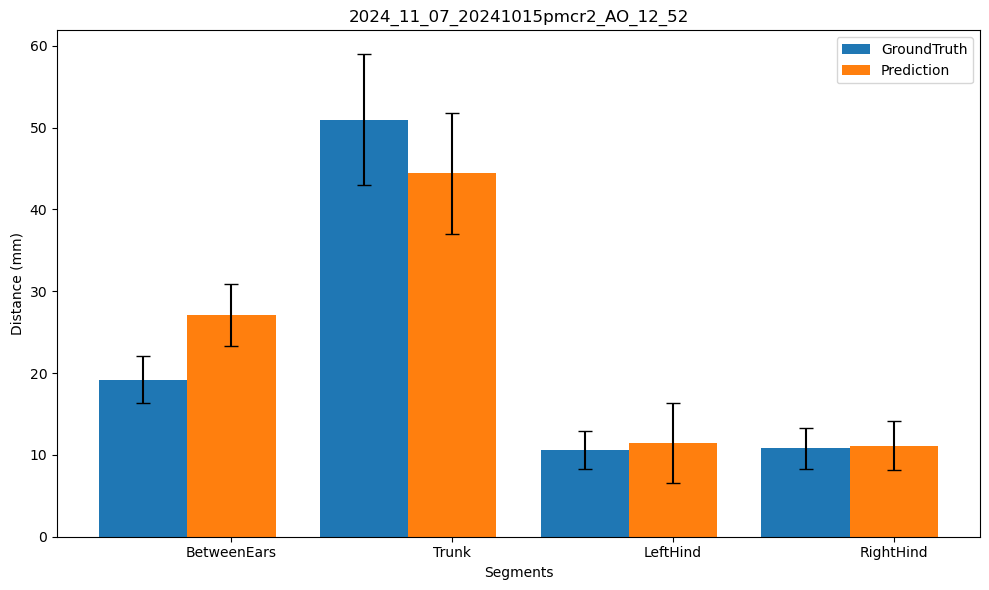

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55/DANNCE/predict00/vis/2024_10_07_20240916v1r1_17_55.jpg'.


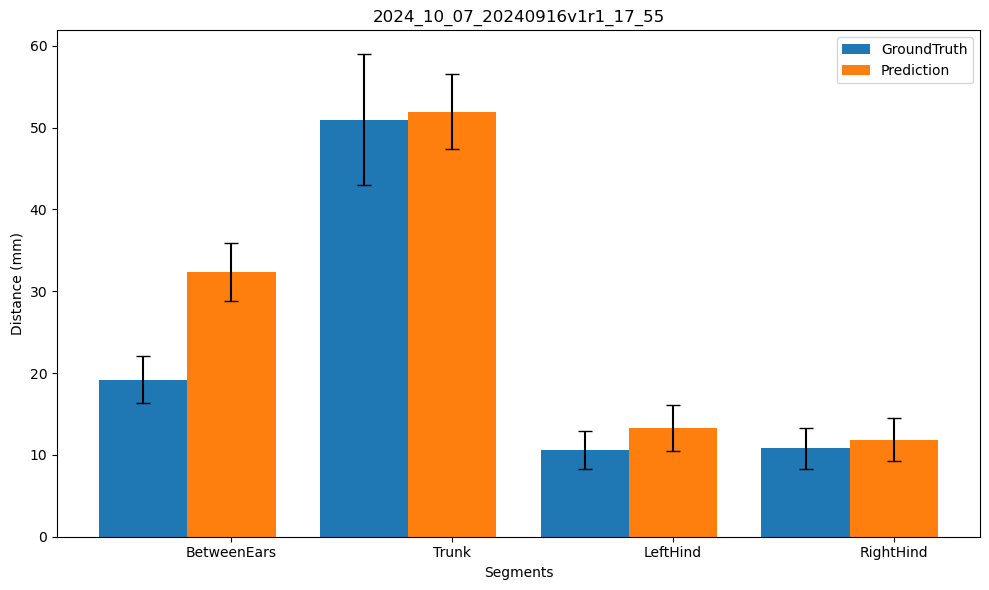

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/0cricket_test_2_14_00/DANNCE/predict00/vis/2024_11_06_0cricket_test_2_14_00.jpg'.


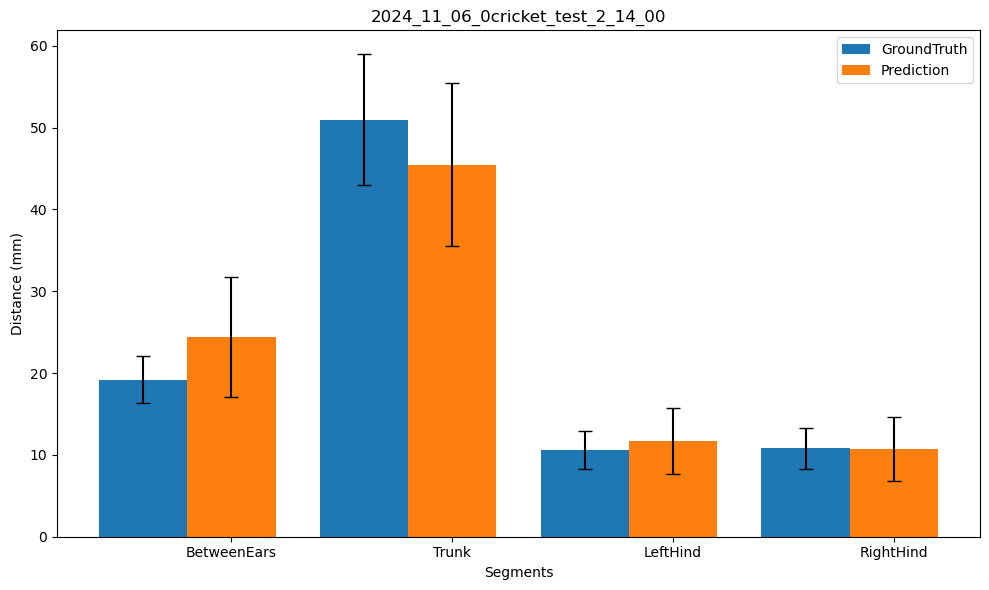

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/0cricket_test_3_14_32/DANNCE/predict00/vis/2024_11_06_0cricket_test_3_14_32.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/0cricket_test_all_dead_3_14_50/DANNCE/predict00/vis/2024_11_06_0cricket_test_all_dead_3_14_50.jpg'.


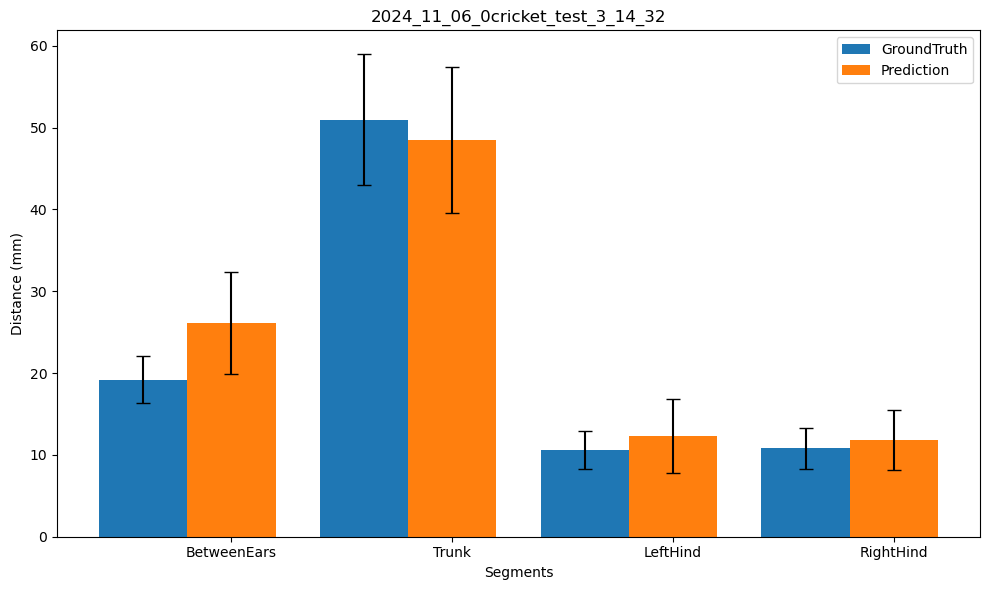

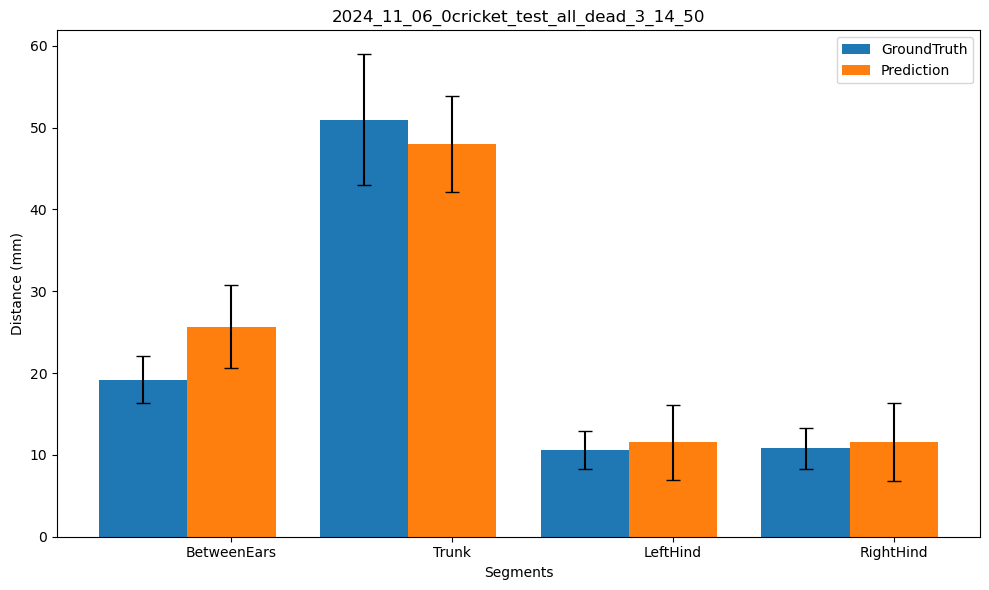

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/0cricket_test_1/DANNCE/predict00/vis/2024_11_06_0cricket_test_1.jpg'.
Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240707-PMC-r1/DANNCE/predict00/vis/2024_09_18_20240707-PMC-r1.jpg'.


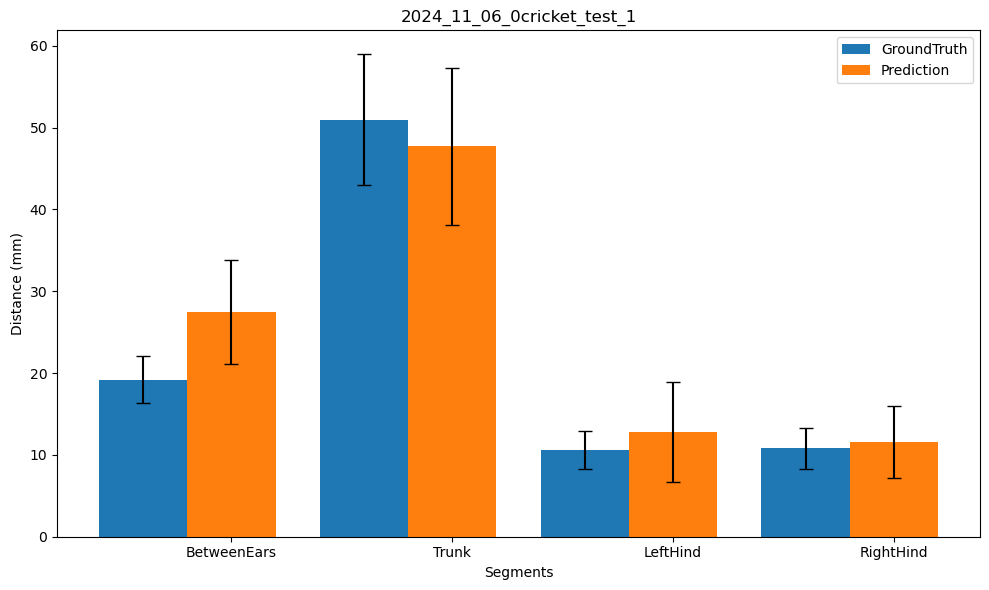

Plot saved as '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819-V1-r2/DANNCE/predict00/vis/2024_09_18_20240819-V1-r2.jpg'.


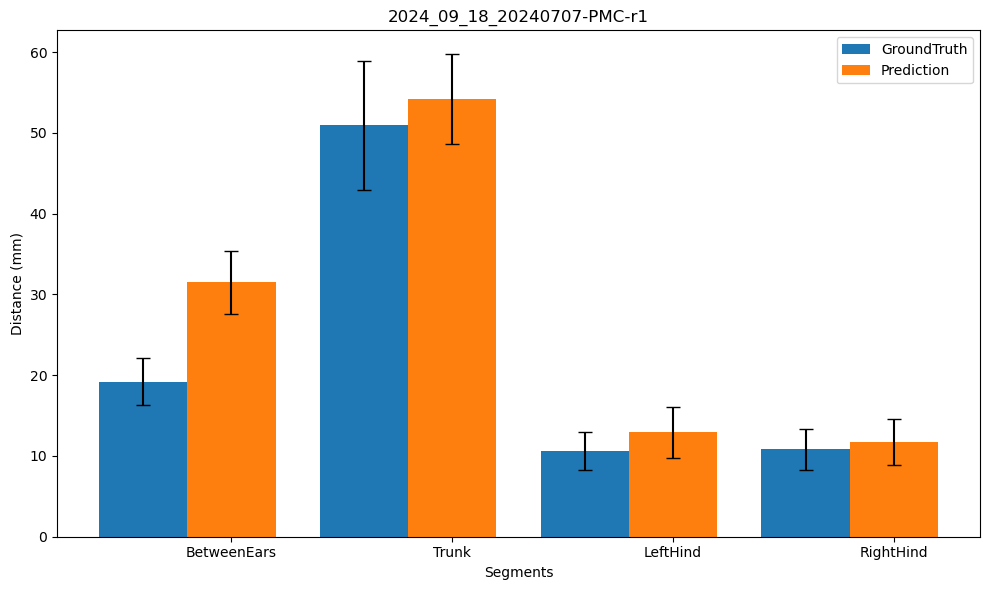

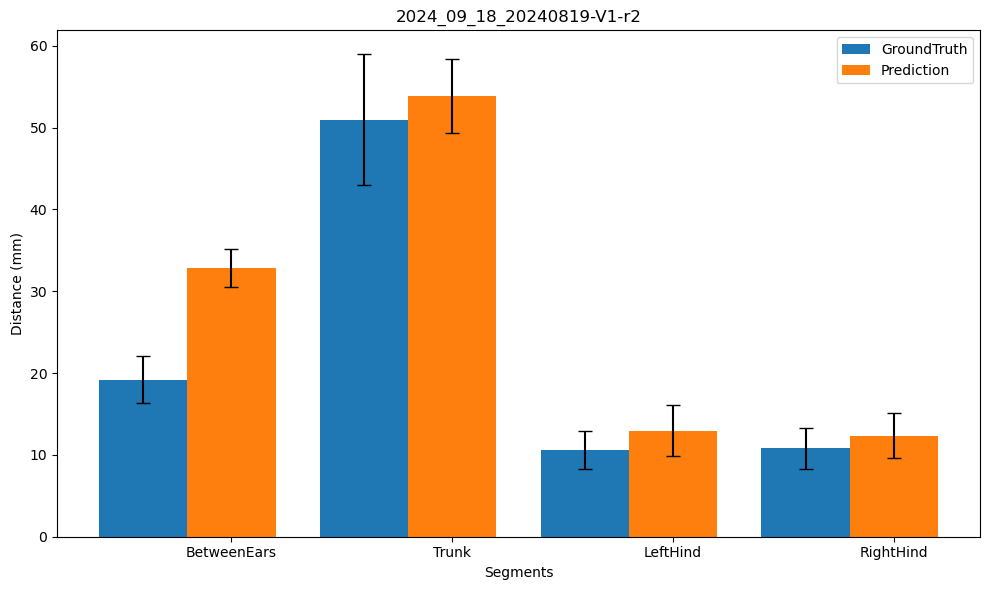

In [23]:
# single dannce valid


from useful_files.sophie_check_dannce_mir_modif import dannce_valid

for_dannce_vis = filtered_table


records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(for_dannce_vis['date_folder'], for_dannce_vis['rec_file'])
]

# Iterate through the records and process each one sequentially
# for record in records:
#     base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
#     print(base_path)
#     try:
#         dannce_valid(base_path) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False
#     except Exception as e:
#         print(f" An error occurred while processing {base_path}: {e}")
#         # Skip to the next record if an error occurs
#         continue

# #trying for parallel processing again:
from concurrent.futures import ProcessPoolExecutor, as_completed

def process_record(record):
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    try:
        dannce_valid(base_path)
    except Exception as e:
        print(f"An error occurred while processing {base_path}: {e}")
        # Skip to the next record if an error occurs
        pass

with ProcessPoolExecutor() as executor:
    futures = [executor.submit(process_record, record) for record in records]
    for future in as_completed(futures):
        pass  # You can retrieve results or handle exceptions here if needed
